<a href="https://colab.research.google.com/github/taceroc/light_echo_modeling/blob/main/v838I.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# %matplotlib notebook
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib


from astropy.coordinates import (cartesian_to_spherical, SkyCoord, Distance, Galactic, EarthLocation, AltAz, CartesianRepresentation, SphericalRepresentation)
from astropy import units as u
# Calculate observer's local sidereal time (LST)
from astropy.time import Time
from astropy.coordinates import EarthLocation

%config InlineBackend.figure_format='retina'



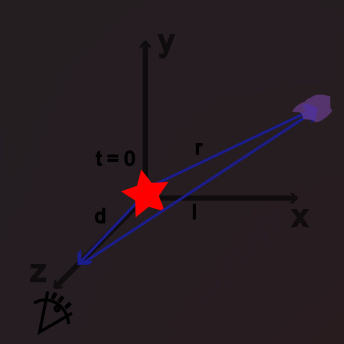


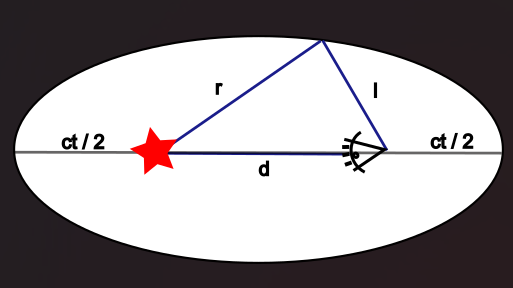

# [On the Light Echo in V838 Mon. R.Tylenda(2004)](https://https://www.aanda.org/articles/aa/pdf/2004/04/aa0015.pdf)

Origin: light source

z: along the line of sight towards the observer

t = 0: source emits a shor light flash.

At t the scattered echo is seen by the observer. The illuminated dust lis on a surface define by

$r + l = d +ct$

$d$: distance between source and observer

$r = \sqrt{x^2 + y^2 +z^2}$: distance between dust and the source

$l = \sqrt{x^2 + y^2 +(d-z)^2}$: distance between dust and observer

$ct$: delay time between the detection of light from the source and the detection of the LE



If $d >> x,y$: the observer angular dimensions of the echo is small

$l = \sqrt{x^2 + y^2 +(d-z)^2} = d-z$

The surface that the define the illuminated dust ($r + l = d +ct$) is now $r = z + ct$

$x^2 + y^2 = c^2t^2+2zct$

In the x-z plane, $y=0$

$x^2 = c^2t^2+2zct$

and consider $ct=1$ or $ct=2$

$x = \sqrt{(ct)^2+2zct}$

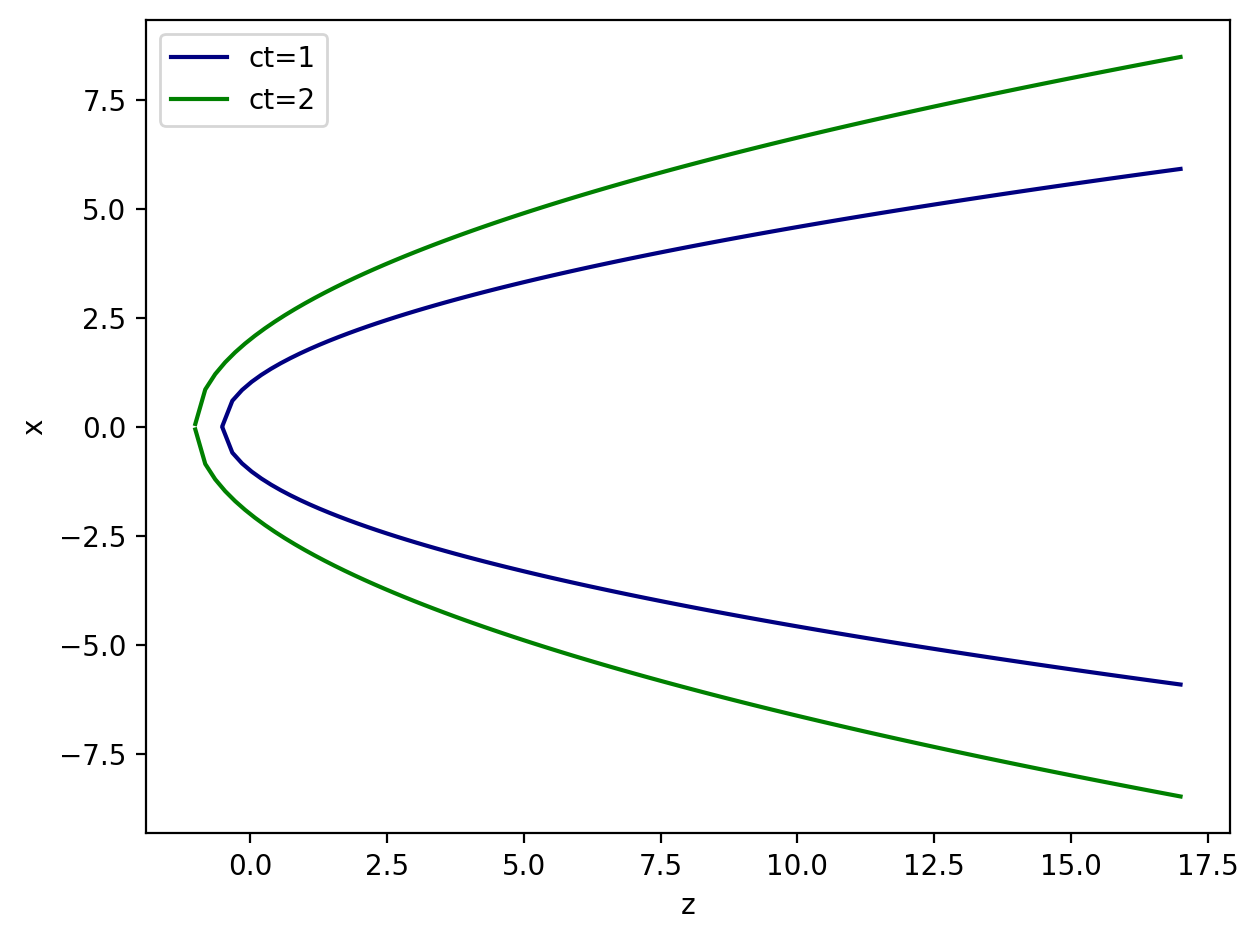

In [3]:
# if ((2*z*1) >= -1):
ct = 1
z = np.linspace(-0.999/2,17,100)
plt.plot(z, (ct**2 + 2  * z * ct)**(1/2), c = "navy", label = "ct=1");
plt.plot(z, -(ct**2 + 2 * z * ct)**(1/2) ,c = "navy");

ct = 2
z = np.linspace(-0.999,17,100)
plt.plot(z, (ct**2 + 2 * z * ct)**(1/2), c = "green", label = "ct=2");
plt.plot(z, -(ct**2 + 2 * z * ct)**(1/2),c = "green");

plt.xlabel("z")
plt.ylabel("x")

plt.legend()

plt.tight_layout()
plt.savefig("figure1.png", dpi = 300)

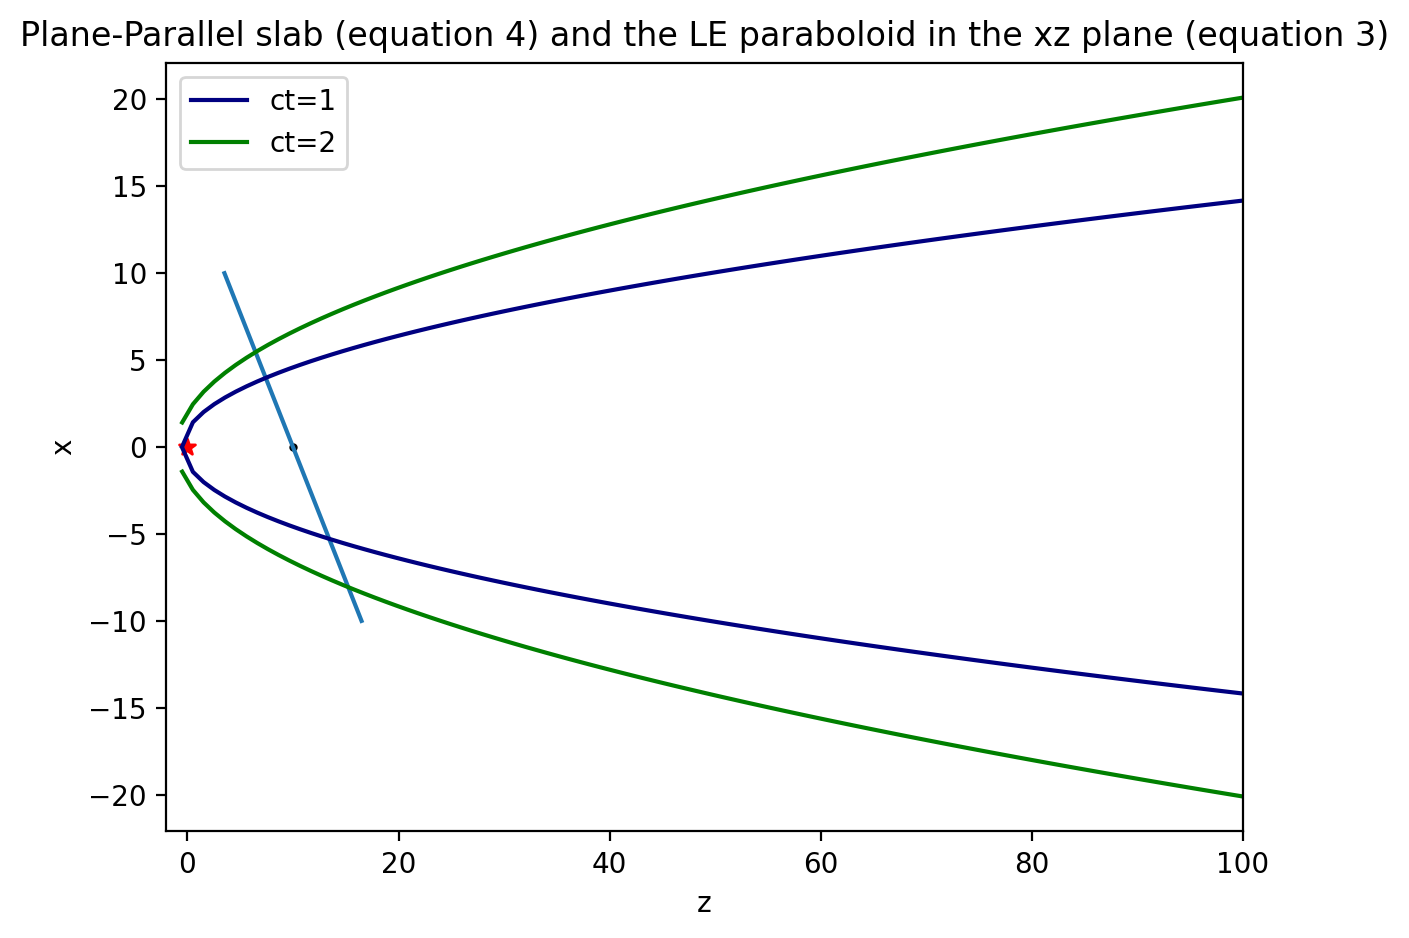

In [4]:
# Define the parameters of the tilted plane
z0 = 10  # z-coordinate of the plane at x = 0
theta = 33 * np.pi/180  # angle of tilt in radians
a = np.tan(theta)

# Define the x-axis range for the plot
x = np.linspace(-10, 10, 100)

# Calculate the z-axis values using the equation of the tilted plane
z = z0 - a * x
plt.plot(z, x)

ct = 1
z = np.linspace(-0.999/2,100,100)
plt.plot(z, (ct**2 + 2 * z * ct)**(1/2), c = "navy", label = "ct=1");
plt.plot(z, -(ct**2 + 2 * z * ct)**(1/2) ,c = "navy");

ct = 2
# z = np.linspace(-0.999,100,100)
plt.plot(z, (ct**2 + 2 * z * ct)**(1/2), c = "green", label = "ct=2");
plt.plot(z, -(ct**2 + 2 * z * ct)**(1/2), c = "green");

plt.xlabel("z")
plt.ylabel("x")
plt.title("Plane-Parallel slab (equation 4) and the LE paraboloid in the xz plane (equation 3)")

plt.scatter(z0, 0, c="k", s=4)
plt.scatter(0, 0, c="red", marker="*")

plt.xlim(-2,100)
# plt.ylim(-0.5,100)

plt.legend()


plt.tight_layout()
plt.savefig("figure1a.png", dpi = 300)

# Parallel Slab

A thin plane-parallel slab pf dust intersects the line of sight at $z_0$, the normal of the slide is incline $\alpha$ respect to the z axis (the line of sight).

Parallel: normales lies in x,z plane

The slab is defined as:

$z = z_0 - ax$, where

$a = \tan\alpha$


The iluminated dust lies on this surface:

$x^2 + y^2 = c^2t^2+2zct$, where for the plane slab $z = z_0 - ax$:

$(x + act)^2 + y^2 = 2z_0ct + (ct)^2(1 + a^2)$

The LE has the shape of a ring with radius:

$r_{le} = \sqrt{2z_0ct + (ct)^2(1 + a^2)} $

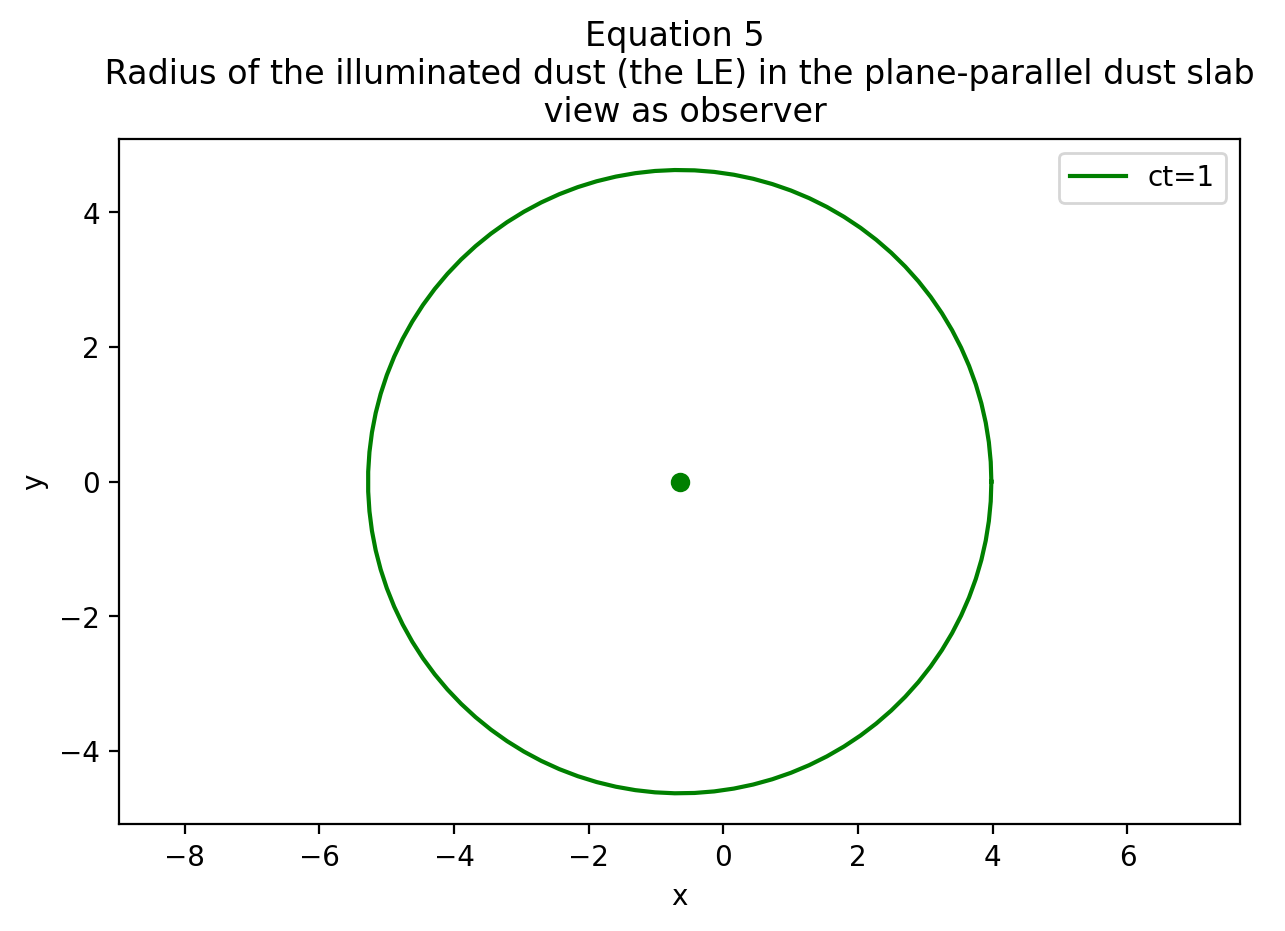

In [5]:
angle = np.linspace(0, 2 * np.pi, 100)


ct = 1
r_le = np.sqrt(2 * z0 * ct + ct**2 * (1 + a**2))
x = r_le * np.cos(angle) - a * ct
y = r_le * np.sin(angle)
# plt.scatter(0, r_le, c="green")
plt.scatter(- a * ct, 0, c="green")
plt.plot(x,y, c="green", label="ct=%s"%ct)


# d_r_le = ct * (z0 + (1 + a**2) * 2) / r_le
# x = d_r_le * np.cos(angle) - a * ct
# y = d_r_le * np.sin(angle)
# # plt.scatter(0, d_r_le, c="navy")
# plt.scatter(- a * ct, 0, c="navy")
# plt.plot(x, y, c="navy", label="ct=%s \nfor a later \ntime"%ct)


plt.legend(loc = "upper right")
plt.title("Equation 5 \n Radius of the illuminated dust (the LE) in the plane-parallel dust slab \n view as observer")
plt.axis('equal')
plt.xlabel("x")
plt.ylabel("y")
# plt.show()



plt.tight_layout()
plt.savefig("figure2a.png", dpi = 300)



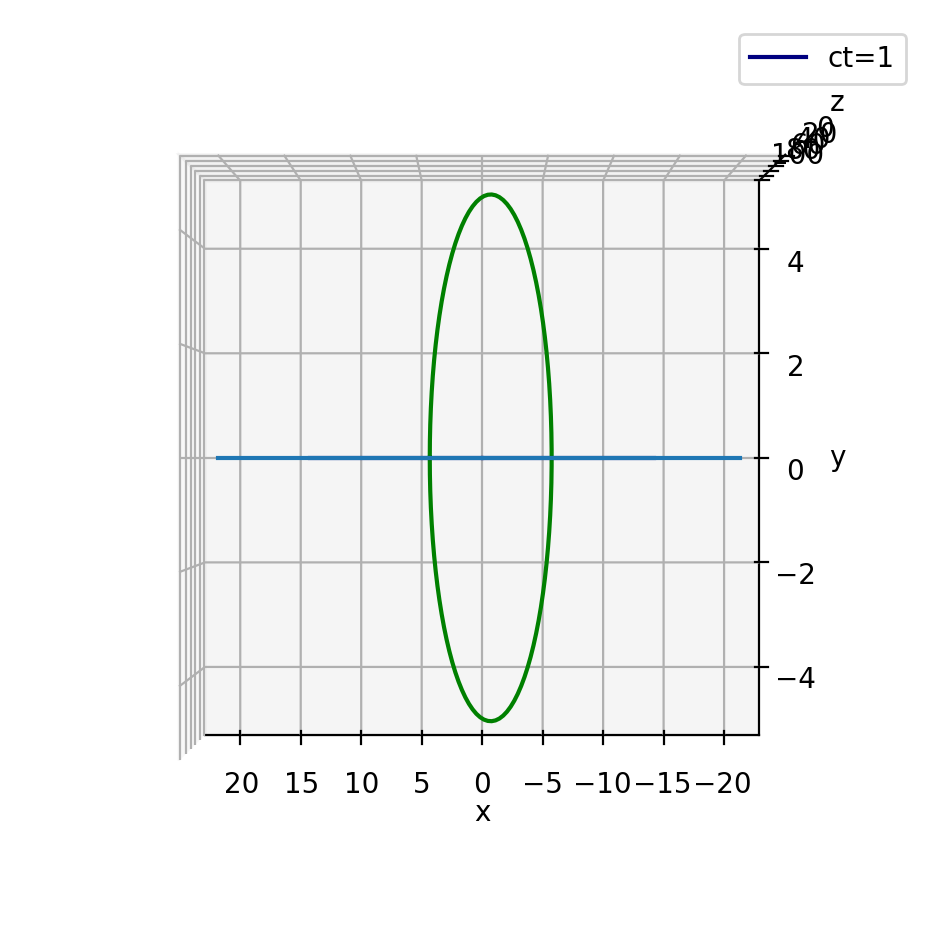

In [6]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ct = 1
r_le = np.sqrt(2 * z0 * ct + ct**2 * (1 + a**2))
x = r_le * np.cos(angle) - a * ct
y = r_le * np.sin(angle)
ax.plot3D(x,y, c="green")

x = np.linspace(-20, 20, 100)
z = np.linspace(-0.999/2,100,100)
ax.plot3D((ct**2 + 2 * z * ct)**(1/2), np.zeros(len(z)), z, c="navy", label="ct=%s"%ct);
ax.plot3D(-(ct**2 + 2 * z * ct)**(1/2), np.zeros(len(z)), z, c="navy");

z = z0 - a * x
ax.plot3D(x,np.zeros(len(z)) ,z)

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');
ax.zaxis.labelpad=-2

plt.legend()


plt.tight_layout()
ax.view_init(-90,90)

plt.show()

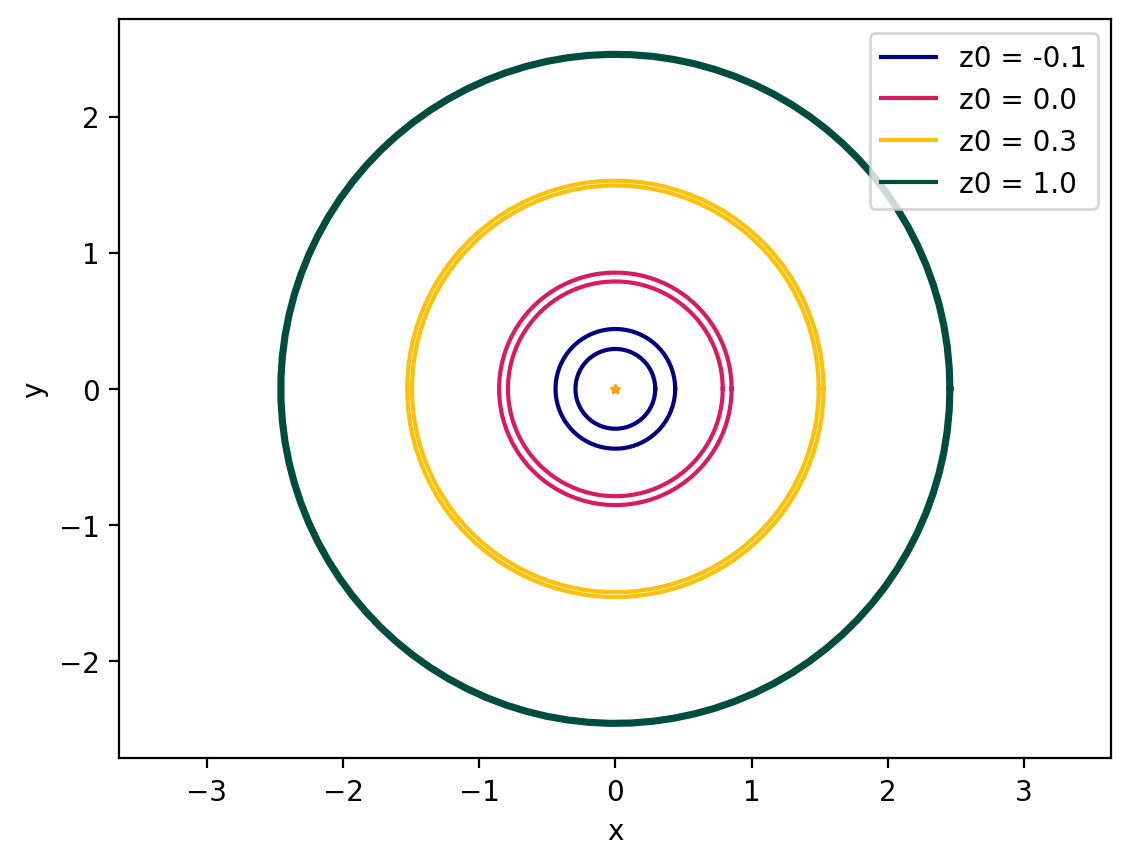

In [7]:
# Define the parameters of the tilted plane
# -- point where the plane-parallel slab of dust intersects the line of sight
z0 = [-0.10, 0, 0.3, 1] # pc
pctoly = 3.26156 # 1pc = 3.26156 light-year
z0ly = np.array(z0) * pctoly
# -- inclination of the plane, is perpendicular to the line of sight (I am using 89 so the tangent don't die)
theta = 0 * np.pi/180  # angle of tilt in radians
a = np.tan(theta)

c = 1 # in light-year / year
t = 300 * 0.00273973 # 5 day in years
ct = c*t
dz0 = 0.02 * pctoly # in ly
# colors
cmap = plt.cm.Paired(np.linspace(0, 1, 8))
cmap = ["navy", "#D81B60", "#FFC107", "#004D40", "#FFC107", "#1E88E5"]

for i,z in enumerate(z0ly):
  # print(z,i)
  # -- radii LE ring as seen by z including the thickness of 0.02
  r_le = np.sqrt(2 * z * ct + (ct)**2 * (1 + a**2) + 2 * (dz0 / 2) * ct)

  angle = np.linspace(0, 2 * np.pi, 100)
  # -- origin of x is at act
  x = r_le * np.cos(angle) - a * ct
  y = r_le * np.sin(angle)
  plt.plot(x, y, color=cmap[i])

  # -- radii LE ring as seen by z including the thickness of 0.02
  r_le = np.sqrt(2 * z * ct + (ct)**2 * (1 + a**2) - 2 * (dz0 / 2) * ct)
  x = r_le * np.cos(angle) - a * ct
  y = r_le * np.sin(angle)

  # plt.scatter(a*1,r_le)
  # -- plot the oring aka the source aka the SN
  plt.scatter(-a * ct,0, marker="*", s=7, color="orange")
  plt.plot(x,y, color=cmap[i], label="z0 = %s"%(z/pctoly))



plt.axis('equal')
plt.xlabel("x")
plt.ylabel("y")
plt.legend(loc = "upper right")

# plt.title("Equation 5 \n Radius of the illuminated dust (the LE) in the plane-parallel dust slab \n view as observer")
plt.show()

In [8]:
Deltat = [50, 150, 250, 300, 400, 500] # days
dtoy = 0.00273973 # 1 day = 0.00273973 y
Deltat_y = np.array(Deltat) * dtoy
# -- point where the plane-parallel slab of dust intersects the line of sight
# -- inclination of the plane, is perpendicular to the line of sight (I am using 89 so the tangent don't die)
alpha = 0.0*np.pi/180  # angle of tilt in radians
a = np.tan(alpha)

dt0 = 50 * dtoy


In [9]:
np.arctan(4/16308) * 180 / np.pi * 3600, np.arctan((4/16308)) * (180 / np.pi)* 3600

(50.592298776231836, 50.59229877623184)

https://esahubble.org/images/heic0304f/

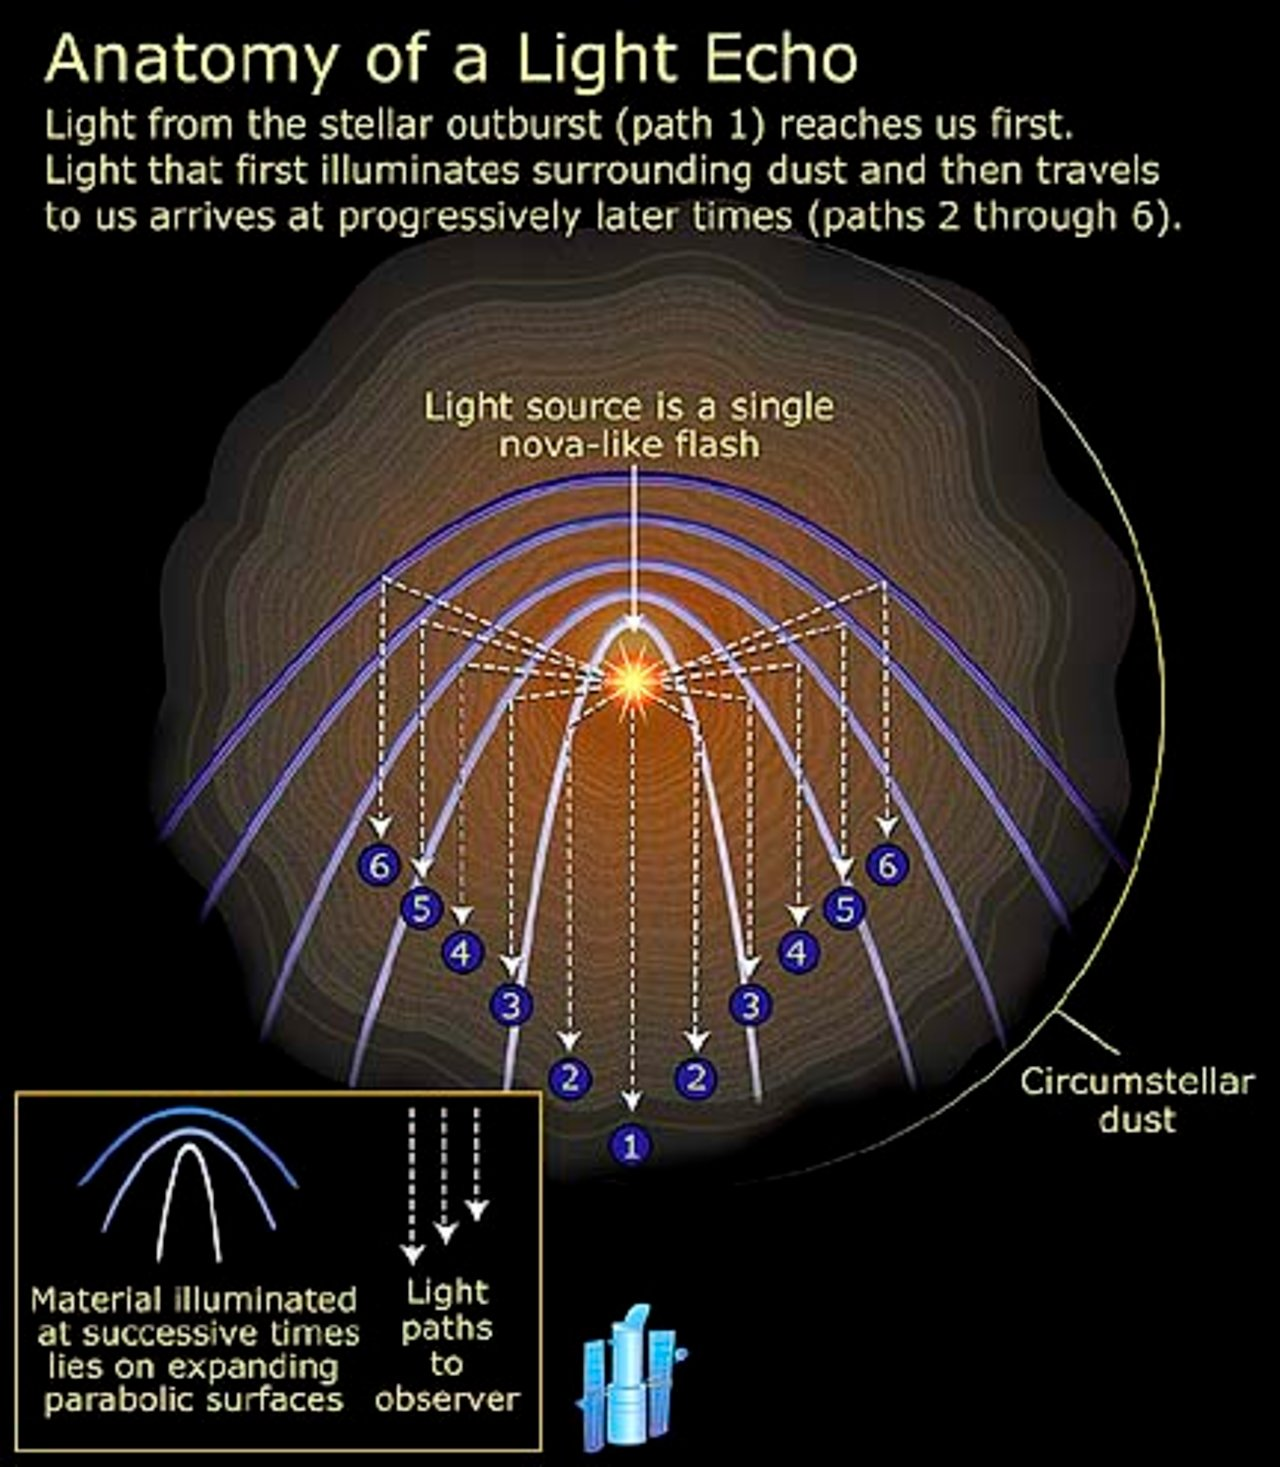

In [11]:
(2 * (-0.10 - (0.02*0.5))*pctoly )/ (1+ np.tan(0*np.pi/180)**2) / (dtoy)

-261.902888240812

In [12]:
(2 * (-0.10 + (0.02*0.5))*pctoly )/ (1+ np.tan(0*np.pi/180)**2) / (dtoy)

-214.28418128793714

## Surface brightness

The central source radiates at a luminosity L$_\nu$, the intensity I$_\nu$ of the radiation scattered at point (x,y,z) can be calcualted from

$I_\nu = \frac{\kappa_\nu L_\nu}{4\pi r^2}$ (1)

$\kappa_\nu$: scattering coefficient

$\kappa_\nu = n_s \sigma_s Q_\nu F_\nu(\phi)$



*   $n_s$: number density of scattering particle - grains (Hydrogen)
*   $\sigma_s$: particle cross section - grains (Hydrogen)
*   $Q_\nu$: scattering efficiency (albedo) - grains (Hydrogen)
*   $F_\nu(\phi)$: Scattering phase function for scattering angle $\phi$.


*   From Patat RR, $n_s = 2.3 \times (100^3) m^{-3}$
*   From Patat RR, $\sigma_s = 5\times 10^{-22} / (100 ^ 2) m^2$
*   From Patat RR, $Q_\nu$: 0.6
*   Scattering is isotropic $F_\nu(\phi) = \frac{1}{4\pi}$, so scattering angle $\phi = \pi/2$.

For the luminosity I am considering $L = 15,000 L_\odot\$

Integrating (1) along the z axis over the dusty medium gives the echo surface brightness in units of flux per solid angle at any given time.

For the Parallel Slab

$SB_\nu = \frac{\kappa_\nu L_\nu}{4\pi r^2} \Delta z_0$

$r = z_0 -ax + ct$ ($r = z + ct$, $z = z_0 - ax$)







## Define parameters for surface brightness

In [13]:
# 1pc = 3.086e+16m
pctom = 3.086e+16
n = 2.3 * (100 ** 3) #m-3
n = n * ( pctom ** 3 ) / ( pctoly ** 3 )
sigma = 5e-22 / (100 ** 2) #m2 #RR paper
sigma = ( sigma / ( (pctom ** 2) ) ) * ( pctoly ** 2 )
albedo = 0.6
Fphi = 1/4 * np.pi
k = n * sigma * albedo * Fphi
# L = 15,000 x 3.9e26 # watts = kg m ^2 / s^3
L = (15000 * 3.9e36) * ((60 * 60 * 24 * 365) ** 3) * (pctoly ** 2) / (pctom ** 2)
Ir = k * L / (4 * np.pi)

In [14]:
sigma

5.585073661538383e-58

In [15]:
Ir

8.362463698424039e+26

In [16]:
angle = np.linspace(0, 2*np.pi, 100)
surface = np.zeros((len(Deltat_y), len(z0ly), 100))

for j, time in enumerate(Deltat_y):
  ct = time * c
  for i, z in enumerate(z0ly):
    if z < 0:
      ti = (-2 * z)/(c * (1 + a**2))
      # print(ti)
      if time >= ti:
        r_le = np.sqrt(2 * z * ct + (ct)**2 * (1 + a**2) )
        x = r_le * np.cos(angle) - a * ct
        surface[j, i, :] = Ir * dz0 / ((z - a * x + ct)**2)
      else:
        surface[j, i, :] = Ir * np.zeros(len(x))
    else:
      ti = 0
      if time >= 0:
        r_le = np.sqrt(2 * z * ct + (ct)**2 * (1 + a**2))
        x = r_le * np.cos(angle) - a * ct
        surface[j, i, :] = Ir * dz0 / ((z - a * x + ct)**2)

In [17]:
surface.shape

(6, 4, 100)

In [18]:
mean = []
std = []
for j, time in enumerate(Deltat_y):
  for i, z in enumerate(z0ly):
    if ( ( j != 0 or j != 1 ) and i != 0 ):
      # print("1", j, i, np.mean(np.log(surface[j, i, :])))
      mean.append(np.mean(np.log(surface[j, i, :])))
      std.append(np.std(np.log(surface[j, i, :])))
    elif ( ( j == 0 or j == 1 ) and i == 0 ):
      # print("2", j, i, np.mean(surface[j, i, :]))
      mean.append(np.mean(surface[j, i, :]))
      std.append(np.mean(surface[j, i, :]))
    else:
      # print("3", j, i, np.mean(np.log(surface[j, i, :])))
      mean.append(np.mean(np.log(surface[j, i, :])))
      std.append(np.std(np.log(surface[j, i, :])))

In [19]:
surface_norm = (mean - np.min(mean)) / (np.max(mean) - np.min(mean))
surface_norm

array([0.        , 1.        , 0.93367369, 0.89843838, 0.        ,
       0.96525407, 0.92672744, 0.89598633, 0.96954888, 0.94909814,
       0.92103544, 0.89371078, 0.95932072, 0.94333183, 0.91853254,
       0.89263159, 0.94540639, 0.93423328, 0.91405253, 0.89057779,
       0.9357763 , 0.9271759 , 0.91012909, 0.88864926])

In [20]:
surface_norm = np.array(surface_norm).reshape(6,4)

In [21]:
surface_norm

array([[0.        , 1.        , 0.93367369, 0.89843838],
       [0.        , 0.96525407, 0.92672744, 0.89598633],
       [0.96954888, 0.94909814, 0.92103544, 0.89371078],
       [0.95932072, 0.94333183, 0.91853254, 0.89263159],
       [0.94540639, 0.93423328, 0.91405253, 0.89057779],
       [0.9357763 , 0.9271759 , 0.91012909, 0.88864926]])

<ipython-input-22-c7566e6c8712>:26: RuntimeWarning: invalid value encountered in sqrt
  r_le_in = np.sqrt(2 * z * ct + (ct)**2 * (1 + a**2) - 2 * (dz0 / 2) * ct )


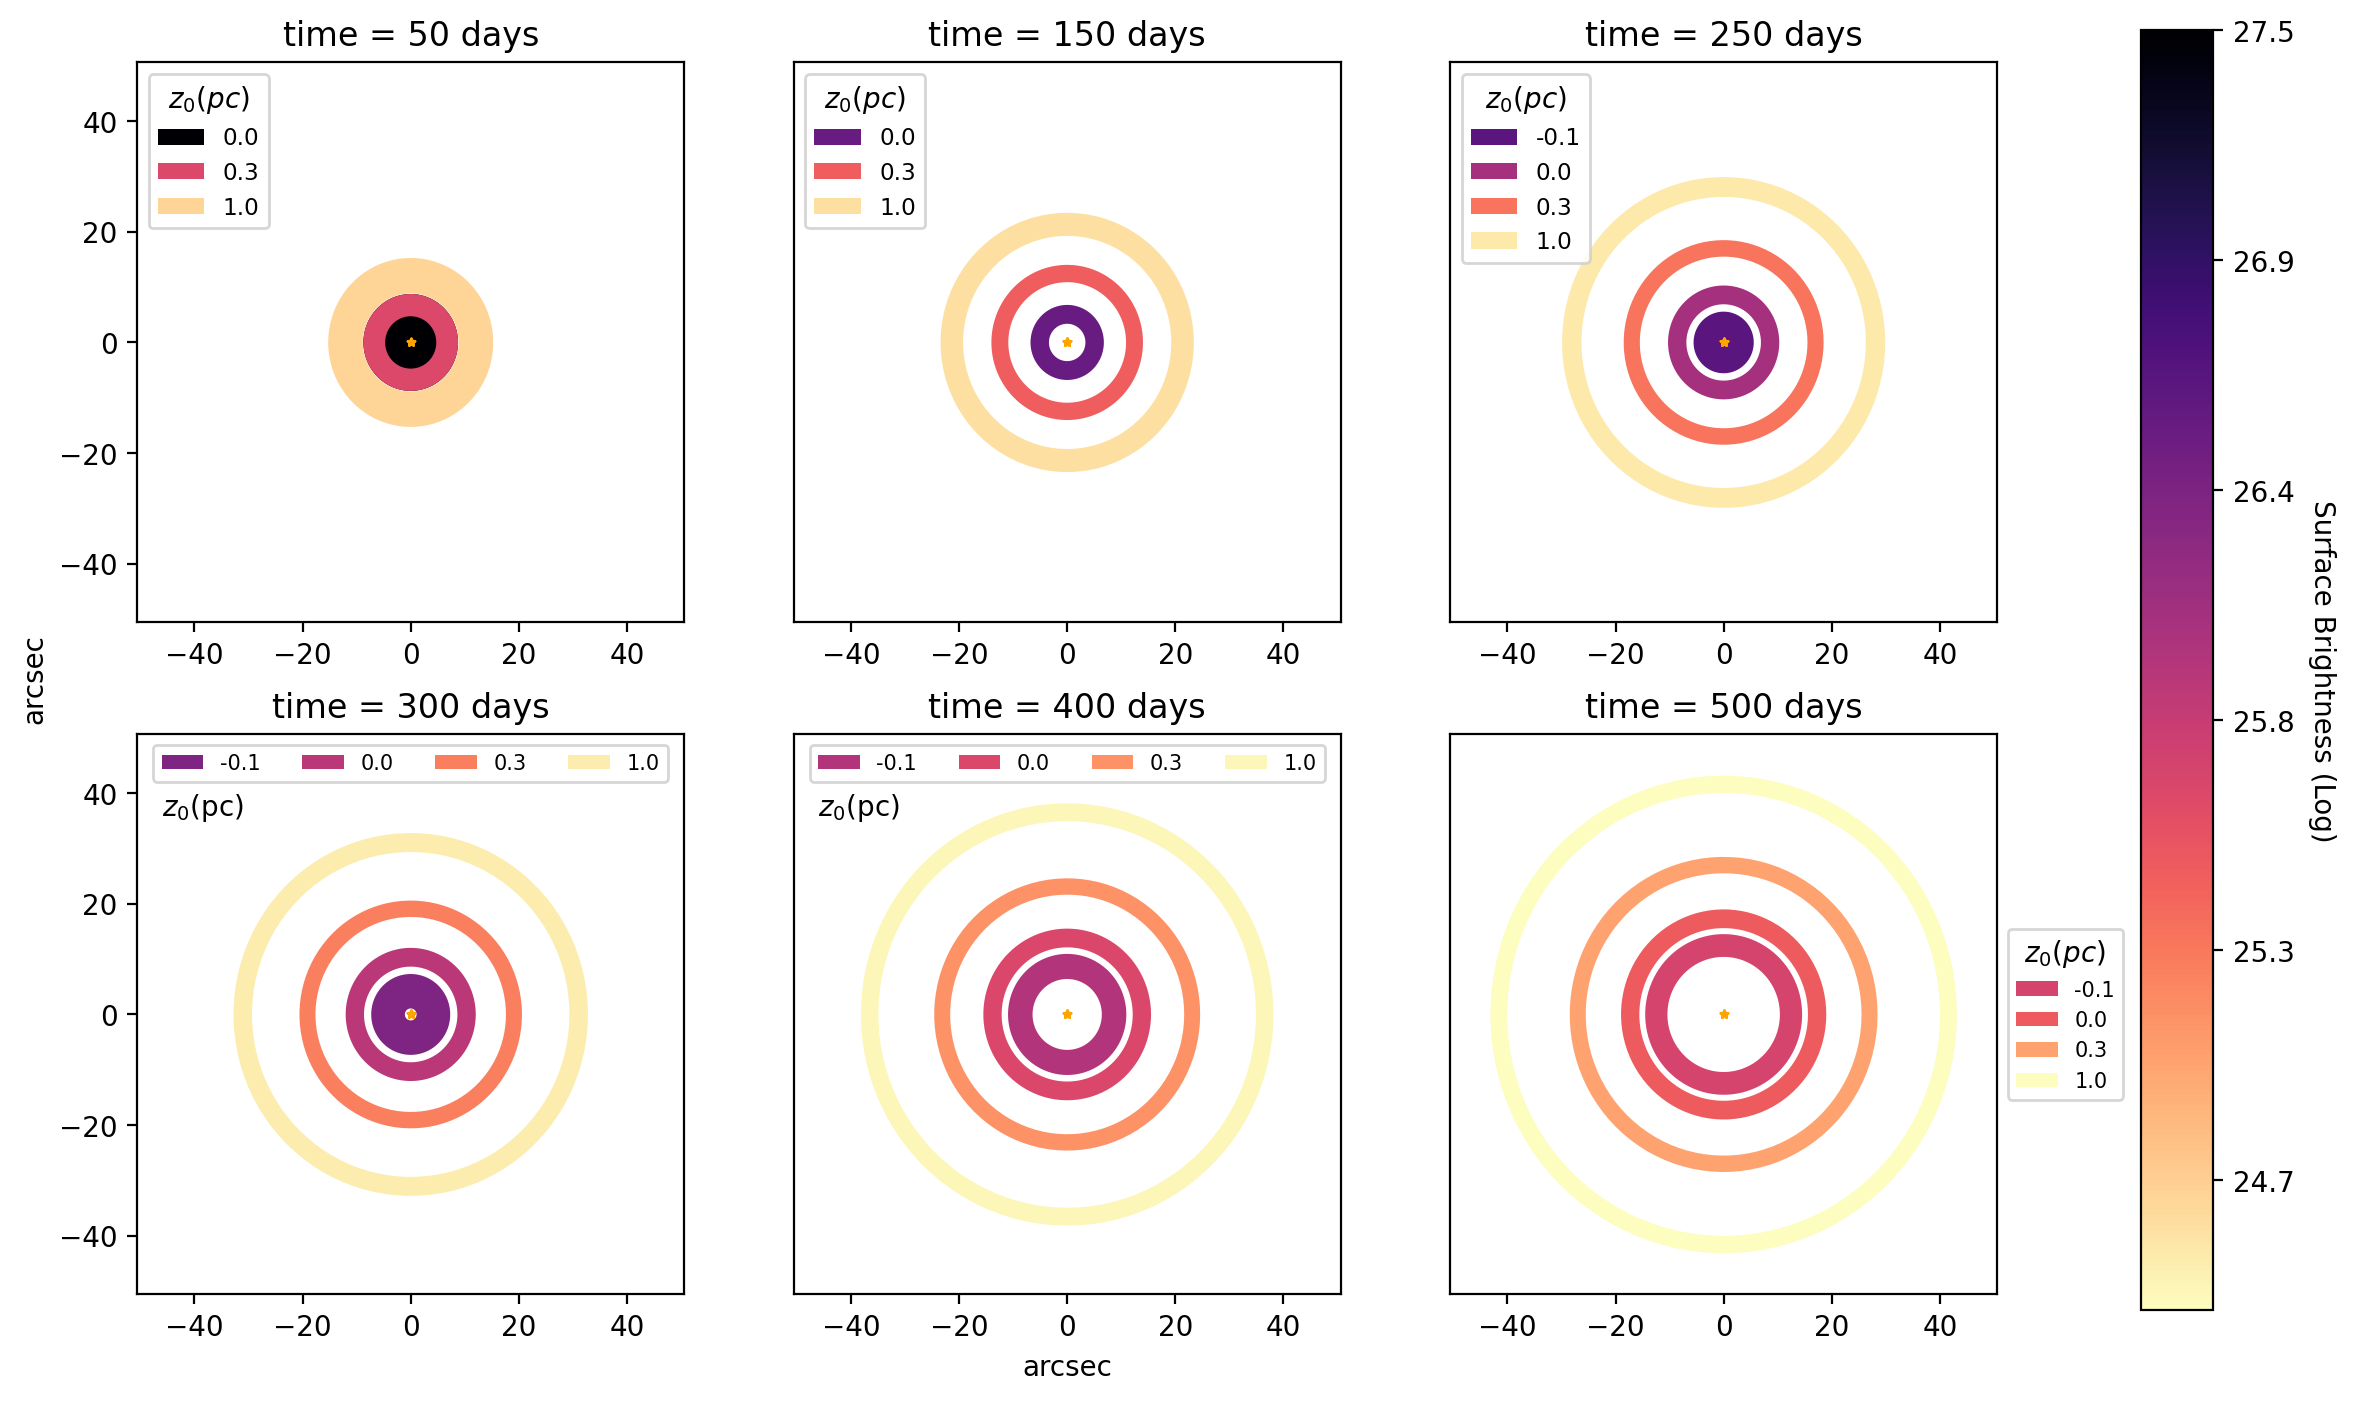

In [22]:
angle = np.linspace(0, 2*np.pi, 100)
cmap = matplotlib.colormaps.get_cmap('magma_r')

normalize = matplotlib.colors.Normalize(vmin=surface_norm[5,3].min(), vmax=surface_norm[0,1].max())

fig, ax = plt.subplots(2, 3, figsize=(12, 8))
# fig.subplots_adjust(wspace=0.03, hspace=0.3)
ax = ax.ravel()
for j, time in enumerate(Deltat_y):
  ct = time*c
  ax[j].set_title("time = %s days"%int(time/ dtoy))
  for i,z in enumerate(z0ly):
      if z < 0:
        ti = (-2 * z)/(c * (1 + a**2))
        # print(ti)
        if time >= ti:
          # -- radii LE ring as seen by z including the thickness of 0.02
          r_le_out = np.sqrt(2 * z * ct + (ct)**2 * (1 + a**2) + 2 * (dz0 / 2) * ct)
          # -- include the thickness in xy plane
          r_le_out = r_le_out + (2 * dz0 * ct + 2 * z * c * (50 * dtoy) + 2 * ct * (50 * dtoy) * (1 + a**2)) / (r_le_out * 4 )
          # -- in arcseconds 5kpc = 16308 ly
          # -- degree to arcseconds
          r_le_out = np.arctan(r_le_out/16308) * (180 / np.pi) * 3600

          # -- radii LE ring as seen by z including the thickness of 0.02
          r_le_in = np.sqrt(2 * z * ct + (ct)**2 * (1 + a**2) - 2 * (dz0 / 2) * ct )
          # -- include the thickness in xy plane
          r_le_in = r_le_in - (2 * dz0 * ct + 2 * z * c * (50 * dtoy) + 2 * ct * (50 * dtoy) * (1 + a**2) ) / (r_le_in * 4 )
          # -- in arcseconds 5kpc = 16308 ly
          # -- degree to arcseconds
          r_le_in = np.arctan(r_le_in/16308) * (180 / np.pi) * 3600

          radii = [r_le_out, r_le_in]
          xs = np.outer(radii, np.cos(angle)) - a * ct
          ys = np.outer(radii, np.sin(angle))

          # in order to have a closed area, the circles
          # should be traversed in opposite directions
          xs[1,:] = xs[1,::-1]
          ys[1,:] = ys[1,::-1]
          ax[j].set_xlim(np.arctan(-4/16308) * (180 / np.pi) * 3600 , np.arctan(4/16308) * (180 / np.pi) * 3600)
          ax[j].set_ylim(np.arctan(-4/16308) * (180 / np.pi) * 3600 , np.arctan(4/16308) * (180 / np.pi) * 3600)
          ax[j].fill(np.ravel(xs), np.ravel(ys), lw=0, color=cmap(normalize(surface_norm[j,i])), label="%s"%(z/pctoly))

          #ax[j].set_box_aspect(1)
          # ax[j].axis('equal')
          # plt.tight_layout()
          ax[j].legend(loc='upper center', bbox_to_anchor=(0.5, 1.05), ncol=4)

        else:
          ax[j].scatter(-a * ct,0, marker="*", s=7, color="orange")
      else:
        ti = 50 * dtoy
        if time <= ti:
          if z / pctoly > 0:
            r_le_out = np.sqrt(2 * z * ct + (ct)**2 * (1 + a**2) + 2 * (dz0 / 2) * ct)
            # -- include the thickness in xy plane
            r_le_out = r_le_out + (2 * dz0 * ct + 2 * z * c * (50 * dtoy) + 2 * ct * (50 * dtoy) * (1 + a**2)) / (r_le_out * 4 )
            # -- in arcseconds 5kpc = 16308 ly
            # -- degree to arcseconds
            r_le_out = np.arctan(r_le_out / 16308) * (180 / np.pi) * 3600
            # -- radii LE ring as seen by z including the thickness of 0.02
            r_le_in = np.sqrt(2 * z * ct + (ct)**2 * (1 + a**2) - 2 * (dz0 / 2) * ct )
            # -- include the thickness in xy plane
            r_le_in = r_le_in - (2 * dz0 * ct + 2 * z * c * (50 * dtoy) + 2 * ct * (50 * dtoy) * (1 + a**2)) / (r_le_in * 4 )
            # -- in arcseconds 5kpc = 16308 ly
            # -- degree to arcseconds
            r_le_in = np.arctan(r_le_in / 16308) * (180 / np.pi) * 3600
            radii = [r_le_out, r_le_in]
            xs = np.outer(radii, np.cos(angle)) - a * ct
            ys = np.outer(radii, np.sin(angle))
            # in order to have a closed area, the circles
            # should be traversed in opposite directions
            xs[1,:] = xs[1,::-1]
            ys[1,:] = ys[1,::-1]
            ax[j].set_xlim(np.arctan(-4/16308) * (180 / np.pi) * 3600 , np.arctan(4/16308) * (180 / np.pi) * 3600)
            ax[j].set_ylim(np.arctan(-4/16308) * (180 / np.pi) * 3600 , np.arctan(4/16308) * (180 / np.pi) * 3600)
            ax[j].scatter(-a * ct,0, marker="*", s=7, color="orange")
            this = ax[j].fill(np.ravel(xs), np.ravel(ys), lw=0, color=cmap(normalize(surface_norm[j,i])), label="%s"%(z/pctoly))
            ax[j].legend(loc='upper left', ncol=1, fontsize='small', title = r"$z_0 (pc)$")
          else:
            r_le_out_old = np.sqrt(2 * z0ly[2] * ct + (ct)**2 * (1 + a**2) + 2 * (dz0 / 2) * ct)
            # -- include the thickness in xy plane
            r_le_out_old = r_le_out_old + (2 * dz0 * ct + 2 * z0ly[2] * c * (50 * dtoy) + 2 * ct * (50 * dtoy) * (1 + a**2)) / (r_le_out_old * 4 )
            # -- in arcseconds 5kpc = 16308 ly
            # -- degree to arcseconds
            r_le_out_old = np.arctan(r_le_out_old / 16308) * (180 / np.pi) * 3600
            r_le_in = np.sqrt(2 * z * ct + (ct)**2 * (1 + a**2) - 2 * (dz0 / 2) * ct )
            # -- include the thickness in xy plane
            r_le_in = r_le_in - (2 * dz0 * ct + 2 * z * c * (50 * dtoy) + 2 * ct * (50 * dtoy) * (1 + a**2)) / (r_le_in * 4 )
            # -- in arcseconds 5kpc = 16308 ly
            # -- degree to arcseconds
            r_le_in = np.arctan(r_le_in / 16308) * (180 / np.pi) * 3600
            radii = [r_le_out_old, r_le_in]
            xs = np.outer(radii, np.cos(angle)) - a * ct
            ys = np.outer(radii, np.sin(angle))
            # in order to have a closed area, the circles
            # should be traversed in opposite directions
            xs[1,:] = xs[1,::-1]
            ys[1,:] = ys[1,::-1]
            ax[j].set_xlim(np.arctan(-4/16308) * (180 / np.pi) * 3600 , np.arctan(4/16308) * (180 / np.pi) * 3600)
            ax[j].set_ylim(np.arctan(-4/16308) * (180 / np.pi) * 3600 , np.arctan(4/16308) * (180 / np.pi) * 3600)
            ax[j].scatter(-a * ct,0, marker="*", s=7, color="orange")
            this = ax[j].fill(np.ravel(xs), np.ravel(ys), lw=0, color=cmap(normalize(surface_norm[j,i])), label="%s"%(z/pctoly))
            ax[j].legend(loc='upper left', ncol=1, fontsize='small', title = r"$z_0 (pc)$")

        elif time > ti:
          # -- radii LE ring as seen by z including the thickness of 0.02
          r_le_out = np.sqrt(2 * z * ct + (ct)**2 * (1 + a**2) + 2 * (dz0 / 2) * ct)
          # -- include the thickness in xy plane
          r_le_out = r_le_out + (2 * dz0 * ct + 2 * z * c * (50 * dtoy) + 2 * ct * (50 * dtoy) * (1 + a**2)) / (r_le_out * 4 )
          # -- in arcseconds 5kpc = 16308 ly
          # -- degree to arcseconds
          r_le_out = np.arctan(r_le_out / 16308) * (180 / np.pi) * 3600

          # -- radii LE ring as seen by z including the thickness of 0.02
          r_le_in = np.sqrt(2 * z * ct + (ct)**2 * (1 + a**2) - 2 * (dz0 / 2) * ct )
          # -- include the thickness in xy plane
          r_le_in = r_le_in - (2 * dz0 * ct + 2 * z * c * (50 * dtoy) + 2 * ct * (50 * dtoy) * (1 + a**2)) / (r_le_in * 4 )
          # -- in arcseconds 5kpc = 16308 ly
          # -- degree to arcseconds
          r_le_in = np.arctan(r_le_in / 16308) * (180 / np.pi) * 3600
          radii = [r_le_out, r_le_in]
          xs = np.outer(radii, np.cos(angle)) - a * ct
          ys = np.outer(radii, np.sin(angle))

          # in order to have a closed area, the circles
          # should be traversed in opposite directions
          xs[1,:] = xs[1,::-1]
          ys[1,:] = ys[1,::-1]
          ax[j].set_xlim(np.arctan(-4/16308) * (180 / np.pi) * 3600 , np.arctan(4/16308) * (180 / np.pi) * 3600)
          ax[j].set_ylim(np.arctan(-4/16308) * (180 / np.pi) * 3600 , np.arctan(4/16308) * (180 / np.pi) * 3600)
          ax[j].scatter(-a * ct,0, marker="*", s=7, color="orange")
          this = ax[j].fill(np.ravel(xs), np.ravel(ys), lw=0, color=cmap(normalize(surface_norm[j,i])), label="%s"%(z/pctoly))
          #ax[j].set_box_aspect(1)
          # ax[j].axis('equal')
          if ((j == 3) or (j == 4)):
            ax[j].legend(loc='upper center', bbox_to_anchor=(0.5, 1.0), ncol = 4, prop={'size': 7.5})
          elif (j == 5):
            ax[j].legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol = 1, prop={'size': 7.5}, title = r"$z_0  (pc)$")
          else:
            ax[j].legend(loc='upper left', ncol=1, fontsize='small', title = r"$z_0 (pc)$")


cbax = fig.add_axes([0.96, 0.1, 0.03, 0.80])
ax[1].set_yticks([])
ax[2].set_yticks([])
ax[4].set_yticks([])
ax[5].set_yticks([])

ax[4].set_xlabel("arcsec")
ax[3].set_ylabel("arcsec", x=1, y=1.1)
ax[3].text(-46,36, "$z_0$(pc)")
ax[4].text(-46,36, "$z_0$(pc)")


cb = matplotlib.colorbar.ColorbarBase(cbax, cmap=cmap, norm=normalize, orientation='vertical')
cb.set_label("Surface Brightness (Log)", rotation=270, labelpad=15)

def label_cbrt(x,pos):
    return "{:.1f}".format(np.log10(np.exp((( x * (np.max(mean) - np.min(mean)) )+ (np.min(mean)) ))))

cb.formatter = matplotlib.ticker.FuncFormatter(label_cbrt)
cb.update_ticks()


# plt.tight_layout()
plt.savefig("figure2.png", dpi = 700, bbox_inches='tight')

plt.show()

In [23]:
mean_full = []
for j, time in enumerate(Deltat_y):
  for i, z in enumerate(z0ly):
    if ( ( j != 0 or j != 1 ) and i != 0 ):
      mean_full.append(np.mean(surface[j, i, :]))
    elif ( ( j == 0 or j == 1 ) and i == 0 ):
      mean_full.append(np.mean(surface[j, i, :]))
    else:
      mean_full.append(np.mean(surface[j, i, :]))

In [24]:
mean_full = np.array(mean_full).reshape(6, 4)

In [25]:
mean_full

array([[0.00000000e+00, 2.90692666e+27, 4.38415494e+25, 4.72283943e+24],
       [0.00000000e+00, 3.22991851e+26, 2.82564653e+25, 4.04446790e+24],
       [4.23781151e+26, 1.16277066e+26, 1.97149626e+25, 3.50241053e+24],
       [2.21942969e+26, 8.07479626e+25, 1.68289832e+25, 3.27136468e+24],
       [9.20674291e+25, 4.54207290e+25, 1.26771420e+25, 2.87292567e+24],
       [5.00761298e+25, 2.90692666e+25, 9.89168439e+24, 2.54308187e+24]])

# Spherical Shell

A thin spherically symmetric slab of dust with radius $r_0$ and centered on the source is described as:

$r_0^2 = x^2 + y^2 + z^2$

The iluminated dust lies on this surface:

$x^2 + y^2 = c^2t^2 - 2zct$, where for the spherical shell $r_0^2 = x^2 + y^2 + z^2$:

$x^2 + y^2 = 2r_0ct - (ct)^2$

The LE has the shape of a ring with radius:

$r_{le} = \sqrt{2r_0ct - (ct)^2} $

and it is centered

$x_c = 0, y_c = 0$

In [26]:
r0 = [0.10, 0.30, 1.0] # pc
r0ly = np.array(r0) * pctoly

Deltat_s = [50, 150, 230, 400, 600, 710] # days
Deltat_s_y = np.array(Deltat_s) * dtoy

dr0 = 0.02 * pctoly

dt0 = 50 * dtoy

In [27]:
r0ly

array([0.326156, 0.978468, 3.26156 ])

In [28]:
r0ly / pctoly

array([0.1, 0.3, 1. ])

## Surface brightness

The central source radiates at a luminosity L$_\nu$, the intensity I$_\nu$ of the radiation scattered at point (x,y,z) can be calcualted from

$I_\nu = \frac{\kappa_\nu L_\nu}{4\pi r^2}$ (1)

$\kappa_\nu$: scattering coefficient

$\kappa_\nu = n_s \sigma_s Q_\nu F_\nu(\phi)$



*   $n_s$: number density of scattering particle - grains (Hydrogen)
*   $\sigma_s$: particle cross section - grains (Hydrogen)
*   $Q_\nu$: scattering efficiency (albedo) - grains (Hydrogen)
*   $F_\nu(\phi)$: Scattering phase function for scattering angle $\phi$.


*   From Patat RR, $n_s = 2.3 \times (100^3) m^{-3}$
*   From Patat RR, $\sigma_s = 5\times 10^{-22} / (100 ^ 2) m^2$
*   From Patat RR, $Q_\nu$: 0.6
*   Scattering is isotropic $F_\nu(\phi) = \frac{1}{4\pi}$, so scattering angle $\phi = \pi/2$.

For the luminosity I am considering $L = 15,000 L_\odot\$

Integrating (1) along the z axis over the dusty medium gives the echo surface brightness in units of flux per solid angle at any given time.

For the Soherical Shell

$SB_\nu = \frac{\kappa_\nu L_\nu}{4\pi r r_{le} \Delta r_{le}} \Delta r_0$

$r = (r_0^2 - x^2 - y^2)^{1/2} + ct$,  ($r = z + ct$, $r_0^2 = x^2 + y^2 + z^2$)

In [29]:
# 1pc = 3.086e+16m
pctom = 3.086e+16
n = 2.3 * (100 ** 3) #m-3
n = n * ( pctom ** 3 ) / ( pctoly ** 3 )
sigma = 5e-22 / (100 ** 2) #m2 #RR paper
sigma = ( sigma / ( (pctom ** 2) ) ) * ( pctoly ** 2 )
albedo = 0.6
Fphi = 1/4 * np.pi
k = n * sigma * albedo * Fphi
# L = 15,000 x 3.9e26 # watts = kg m ^2 / s^3
L = (15000 * 3.9e36) * ((60 * 60 * 24 * 365) ** 3) * (pctoly ** 2) / (pctom ** 2)
Ir = k * L / (4 * np.pi)

In [30]:
angle = np.linspace(0, 2*np.pi, 100)
surface_s = np.zeros((len(Deltat_s_y), len(r0ly), 100))

for j, time in enumerate(Deltat_s_y):
  ct = time * c
  for i, r in enumerate(r0ly[0:]):
    # -- expansion time window
    if r >= ct:
      # -- radii LE ring as seen by z including the thickness of 0.02
      r_le_s = np.sqrt(2 * r * ct - (ct)**2 )
      # r_le_in = ct  * ( (r  - (dr0 / 2)  - ct ) / np.sqrt(2 * (r  - (dr0 / 2) ) * (ct ) - (ct )**2 ) )
      # -- in arcseconds 5kpc = 16308 ly
      # -- degree to arcseconds
      # r_le_in = np.arctan(r_le_in/16308) * (180 / np.pi) * 3600
      x = r_le_s * np.cos(angle)
      y = r_le_s * np.sin(angle)
      # surface_s[j, i, :] =  ( Ir * dr0 / (( np.sqrt(r**2 - x**2 - y**2) + ct)**2) ) * (dr0 * ct + (c * 50 * dtoy * np.abs(r - ct))) ** (-1)
      surface_s[j, i, :] =  ( Ir * dr0 / ((r)) ) * (dr0 * ct + (c * dt0 * np.abs(r - ct))) ** (-1)

    # -- collapse time window
    elif 2 * r > ct:
      r_le_s = np.sqrt(2 * r * ct - (ct)**2 )
      # r_le_in = ct  * ( (r  - (dr0 / 2)  - ct ) / np.sqrt(2 * (r  - (dr0 / 2) ) * (ct ) - (ct )**2 ) )
      # -- in arcseconds 5kpc = 16308 ly
      # -- degree to arcseconds
      # r_le_in = np.arctan(r_le_in/16308) * (180 / np.pi) * 3600
      x = r_le_s * np.cos(angle)
      y = r_le_s * np.sin(angle)
      # surface_s[j, i, :] = ( Ir * dr0 / (( np.sqrt(r**2 - x**2 - y**2) + ct)**2) ) * (dr0 * ct + (c * 50 * dtoy * np.abs(r - ct))) ** (-1)
      surface_s[j, i, :] =  ( Ir * dr0 / ((r)) ) * (dr0 * ct + (c * dt0 * np.abs(r - ct))) ** (-1)

    else:
      surface_s[j, i, :] = Ir * np.zeros(len(x))

In [31]:
surface_s.shape

(6, 3, 100)

In [32]:
Deltat_s_y[2]

0.6301379

In [33]:
mean_s = []
std_s = []
for j, time in enumerate(Deltat_s_y):
  for i, r in enumerate(r0ly):
    if np.mean(surface_s[j, i, :]) == 0:
      # print("2", j, i, np.mean(surface_s[j, i, :]))
      mean_s.append(np.mean(surface_s[j, i, :]))
      std.append(np.mean(surface_s[j, i, :]))
    else:
      # print("3", j, i, np.mean(np.log(surface_s[j, i, :])))
      mean_s.append(np.mean(np.log(surface_s[j, i, :])))
      std_s.append(np.std(np.log(surface_s[j, i, :])))

In [34]:
surface_s_norm = (mean_s - np.min(mean_s)) / (np.max(mean_s) - np.min(mean_s))
surface_s_norm

array([1.        , 0.96282409, 0.92419952, 0.99846791, 0.96552738,
       0.92492175, 0.98643297, 0.9680851 , 0.92552448, 0.        ,
       0.96830734, 0.92688773, 0.        , 0.95547822, 0.9286597 ,
       0.        , 0.95127522, 0.92972695])

In [35]:
surface_s_norm = np.array(surface_s_norm).reshape(6,3)

In [36]:
surface_s_norm

array([[1.        , 0.96282409, 0.92419952],
       [0.99846791, 0.96552738, 0.92492175],
       [0.98643297, 0.9680851 , 0.92552448],
       [0.        , 0.96830734, 0.92688773],
       [0.        , 0.95547822, 0.9286597 ],
       [0.        , 0.95127522, 0.92972695]])

In [37]:
r_le_out_all = []
r_le_in_all = []
for j, time in enumerate(Deltat_s_y):
  ct = time * c
  ax[j].set_title("time = %s days"%int(time/ dtoy))
  for i, r in enumerate(r0ly):
    if time <= dt0:
      # -- radii LE ring as seen by z including the thickness of 0.02
        r_le_out = np.sqrt(2 * r * ct - (ct)**2  + 2 * (dr0 / 2) * ct)
        # -- include the thickness in xy plane
        r_le_out = r_le_out + (dr0 * ct + r * c * dt0 - ct * dt0 ) / (r_le_out * 2 )
        # r_le_out = ct * ( (r + (dr0 / 2) - ct ) / np.sqrt(2 * (r + (dr0 / 2) ) * (ct) - (ct )**2 ) )
        # -- in arcseconds 5kpc = 16308 ly
        # -- degree to arcseconds
        r_le_out = np.arctan(r_le_out/16308) * (180 / np.pi) * 3600
        r_le_out_all.append(r_le_out)
        # -- radii LE ring as seen by z including the thickness of 0.02
        r_le_in = np.sqrt(2 * r * ct - (ct)**2 - 2 * (dr0 / 2) * ct)
        # -- include the thickness in xy plane
        r_le_in = r_le_in - (dr0 * ct + r * c * dt0 - ct * dt0 ) / (r_le_in * 2 )
        # r_le_in = ct  * ( (r  - (dr0 / 2)  - ct ) / np.sqrt(2 * (r  - (dr0 / 2) ) * (ct ) - (ct )**2 ) )
        # -- in arcseconds 5kpc = 16308 ly
        # -- degree to arcseconds
        r_le_in = np.arctan(r_le_in/16308) * (180 / np.pi) * 3600
        r_le_in_all.append(r_le_in)
print(r_le_in_all, r_le_out_all)

[2.253053303100126, 4.598939716910714, 8.799692349321285] [4.348357060521944, 7.97317098130522, 14.829686157007576]


<ipython-input-38-238220137c5e>:93: RuntimeWarning: invalid value encountered in sqrt
  r_le_in = np.sqrt(2 * r * ct - (ct)**2 - 2 * (dr0 / 2) * ct)


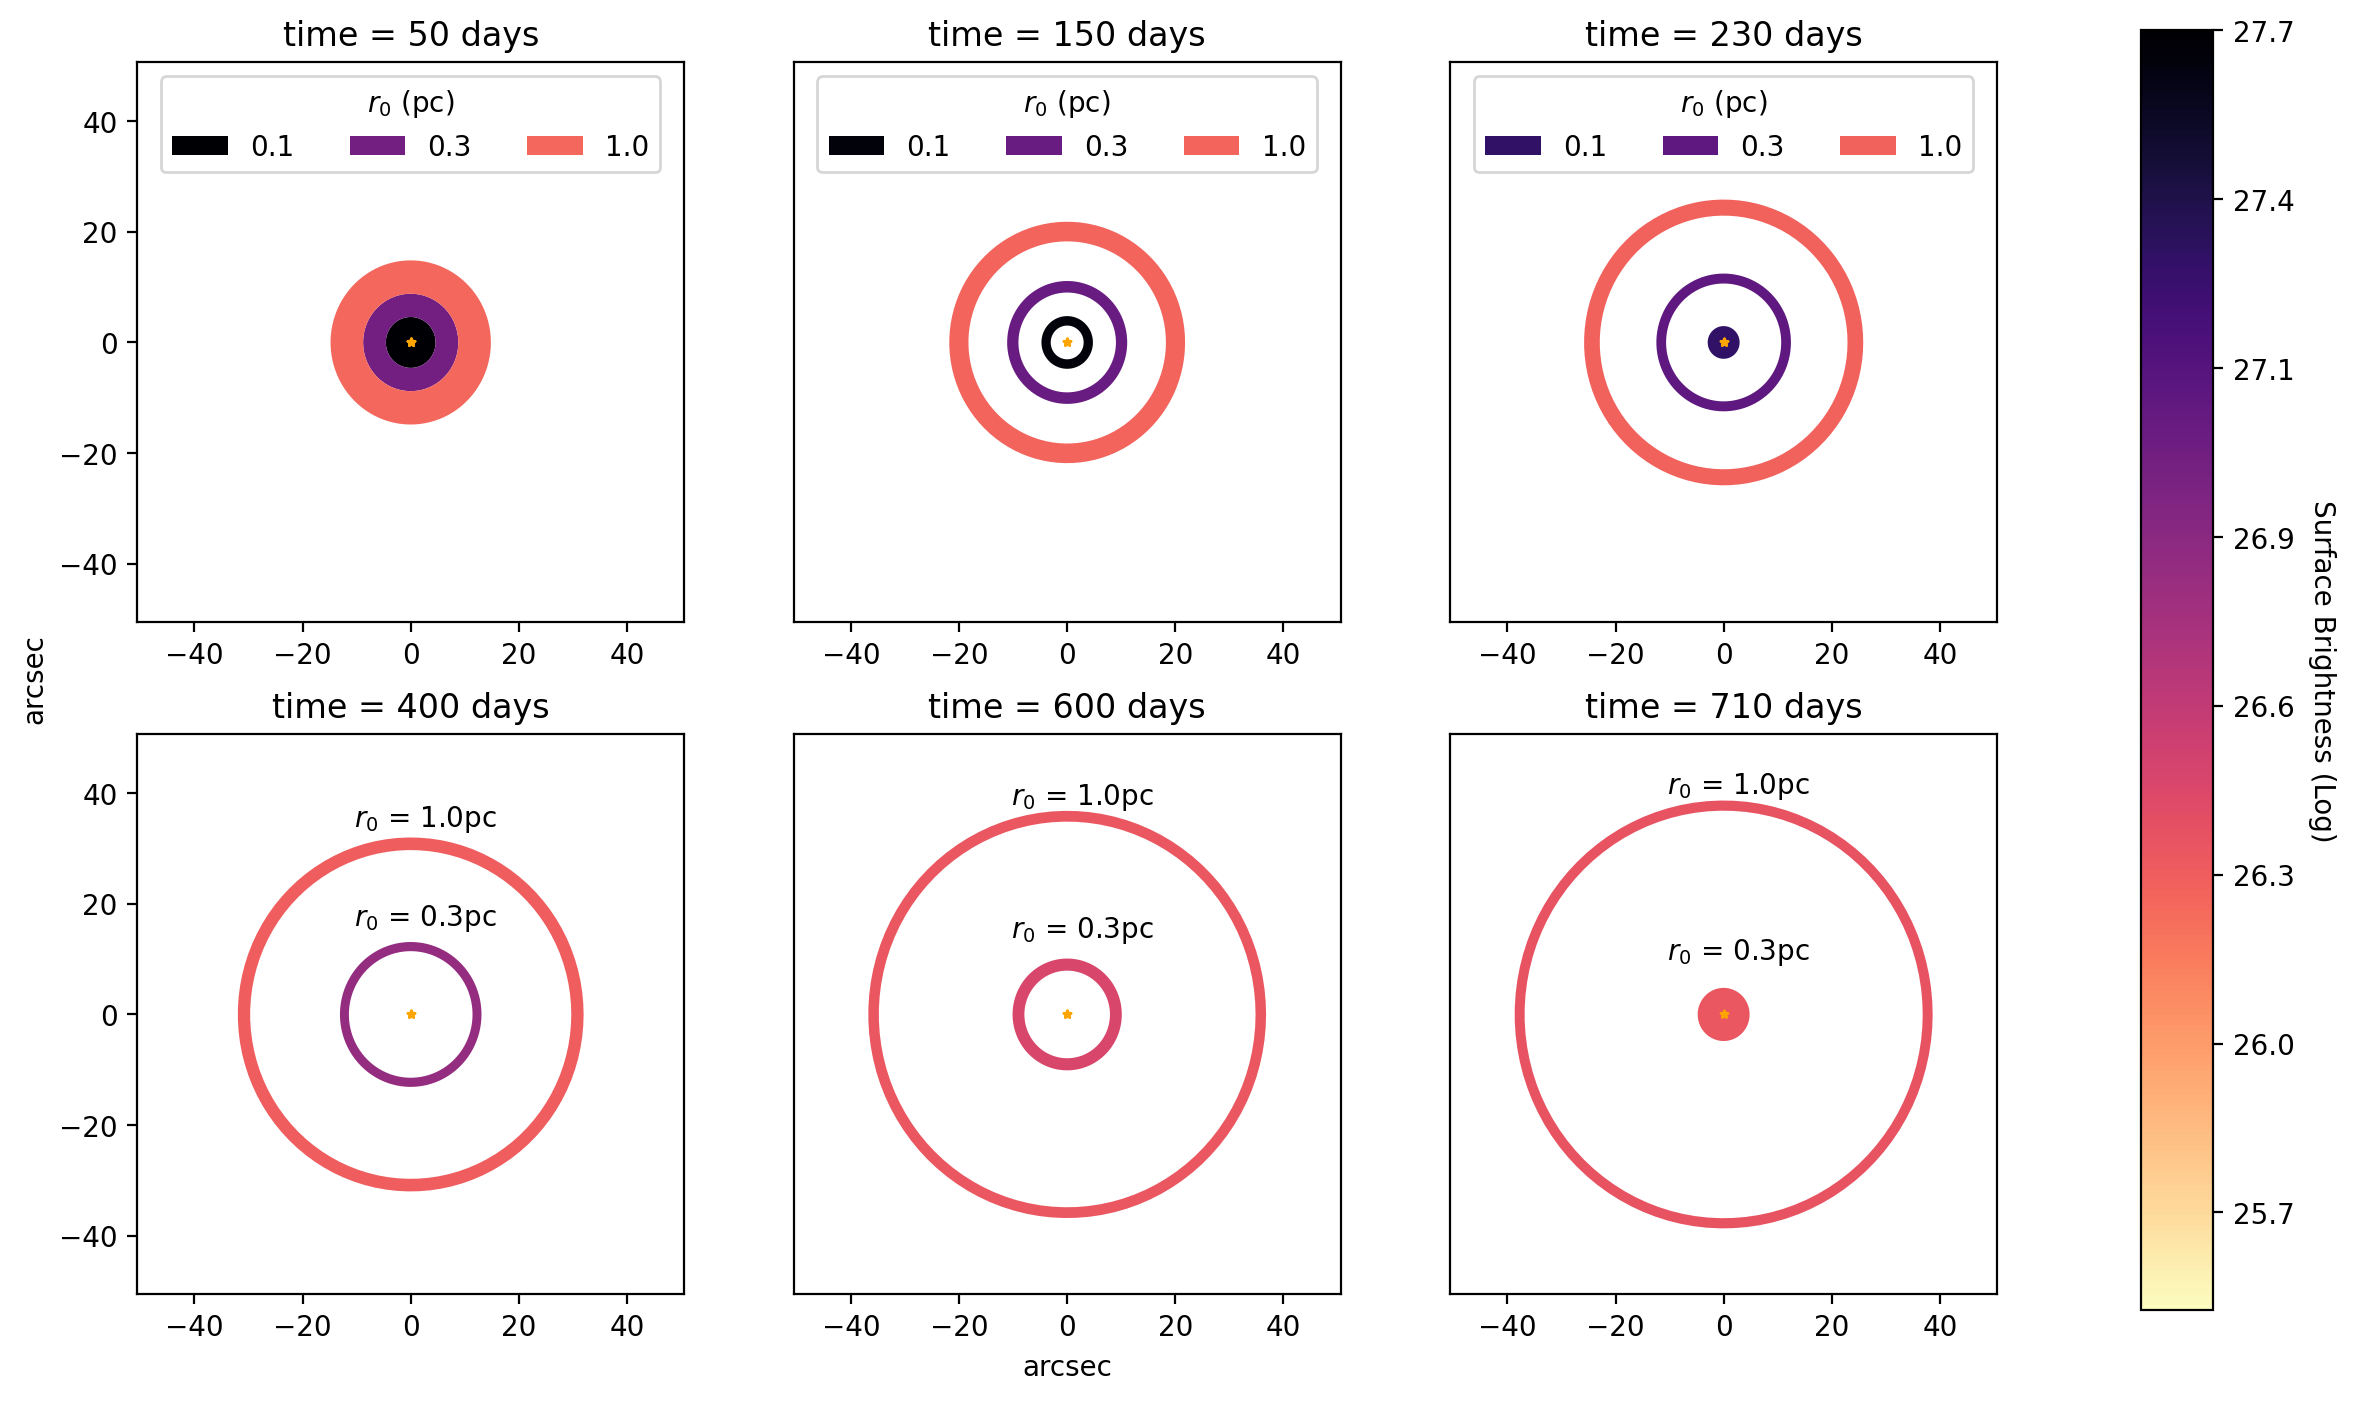

In [38]:
angle = np.linspace(0, 2*np.pi, 100)
cmap = matplotlib.colormaps.get_cmap('magma_r')

normalize_s = matplotlib.colors.Normalize(vmin=surface_s_norm[0,2], vmax=surface_s_norm[0,0])

angle = np.linspace(0, 2*np.pi, 100)
fig, ax = plt.subplots(2, 3, figsize=(12, 8))
ax = ax.ravel()
for j, time in enumerate(Deltat_s_y):
  ct = time * c
  ax[j].set_title("time = %s days"%int(time/ dtoy))
  for i, r in enumerate(r0ly):
    if time <= dt0:
      if r == r0ly[1]:
        r_le_out = r_le_in_all[2]
        radii = [r_le_out, r_le_in_all[1]]
        xs = np.outer(radii, np.cos(angle))
        ys = np.outer(radii, np.sin(angle))
        # in order to have a closed area, the circles
        # should be traversed in opposite directions
        xs[1,:] = xs[1,::-1]
        ys[1,:] = ys[1,::-1]
        ax[j].set_xlim(np.arctan(-4/16308) * (180 / np.pi) * 3600 , np.arctan(4/16308) * (180 / np.pi) * 3600)
        ax[j].set_ylim(np.arctan(-4/16308) * (180 / np.pi) * 3600 , np.arctan(4/16308) * (180 / np.pi) * 3600)
        ax[j].fill(np.ravel(xs), np.ravel(ys), lw=0, color=cmap(normalize(surface_s_norm[j,i])), label="%s"%(r/pctoly))
        ax[j].scatter(0,0, marker="*", s=7, color="orange")
      elif r == r0ly[0]:
        r_le_out = r_le_in_all[1]
        radii = [r_le_out, 0]
        xs = np.outer(radii, np.cos(angle))
        ys = np.outer(radii, np.sin(angle))
        # in order to have a closed area, the circles
        # should be traversed in opposite directions
        xs[1,:] = xs[1,::-1]
        ys[1,:] = ys[1,::-1]
        ax[j].set_xlim(np.arctan(-4/16308) * (180 / np.pi) * 3600 , np.arctan(4/16308) * (180 / np.pi) * 3600)
        ax[j].set_ylim(np.arctan(-4/16308) * (180 / np.pi) * 3600 , np.arctan(4/16308) * (180 / np.pi) * 3600)
        ax[j].fill(np.ravel(xs), np.ravel(ys), lw=0, color=cmap(normalize(surface_s_norm[j,i])), label="%s"%(r/pctoly))
        ax[j].scatter(0,0, marker="*", s=7, color="orange")
      else:
        radii = [r_le_out_all[2], r_le_in_all[2]]
        xs = np.outer(radii, np.cos(angle))
        ys = np.outer(radii, np.sin(angle))
        # in order to have a closed area, the circles
        # should be traversed in opposite directions
        xs[1,:] = xs[1,::-1]
        ys[1,:] = ys[1,::-1]
        ax[j].set_xlim(np.arctan(-4/16308) * (180 / np.pi) * 3600 , np.arctan(4/16308) * (180 / np.pi) * 3600)
        ax[j].set_ylim(np.arctan(-4/16308) * (180 / np.pi) * 3600 , np.arctan(4/16308) * (180 / np.pi) * 3600)
        ax[j].fill(np.ravel(xs), np.ravel(ys), lw=0, color=cmap(normalize(surface_s_norm[j,i])), label="%s"%(r/pctoly))
        ax[j].scatter(0,0, marker="*", s=7, color="orange")
    elif time / dtoy > 50:
      if r >= ct:
        # -- radii LE ring as seen by z including the thickness of 0.02
        r_le_out = np.sqrt(2 * r * ct - (ct)**2  + 2 * (dr0 / 2) * ct)
        # -- include the thickness in xy plane
        r_le_out = r_le_out + (dr0 * ct + r * c * dt0 - ct * dt0 ) / (r_le_out * 2 )
        # r_le_out = ct * ( (r + (dr0 / 2) - ct ) / np.sqrt(2 * (r + (dr0 / 2) ) * (ct) - (ct )**2 ) )
        # -- in arcseconds 5kpc = 16308 ly
        # -- degree to arcseconds
        r_le_out = np.arctan(r_le_out/16308) * (180 / np.pi) * 3600
        # -- radii LE ring as seen by z including the thickness of 0.02
        r_le_in = np.sqrt(2 * r * ct - (ct)**2 - 2 * (dr0 / 2) * ct)
        # -- include the thickness in xy plane
        r_le_in = r_le_in - (dr0 * ct + r * c * dt0 - ct * dt0 ) / (r_le_in * 2 )
        # r_le_in = ct  * ( (r  - (dr0 / 2)  - ct ) / np.sqrt(2 * (r  - (dr0 / 2) ) * (ct ) - (ct )**2 ) )
        # -- in arcseconds 5kpc = 16308 ly
        # -- degree to arcseconds
        r_le_in = np.arctan(r_le_in/16308) * (180 / np.pi) * 3600

        radii = [r_le_out, r_le_in]
        xs = np.outer(radii, np.cos(angle))
        ys = np.outer(radii, np.sin(angle))

        # in order to have a closed area, the circles
        # should be traversed in opposite directions
        xs[1,:] = xs[1,::-1]
        ys[1,:] = ys[1,::-1]
        ax[j].set_xlim(np.arctan(-4/16308) * (180 / np.pi) * 3600 , np.arctan(4/16308) * (180 / np.pi) * 3600)
        ax[j].set_ylim(np.arctan(-4/16308) * (180 / np.pi) * 3600 , np.arctan(4/16308) * (180 / np.pi) * 3600)
        ax[j].fill(np.ravel(xs), np.ravel(ys), lw=0, color=cmap(normalize(surface_s_norm[j,i])), label="%s"%(r/pctoly))
        ax[j].scatter(0,0, marker="*", s=7, color="orange")
        # ax[j].legend(loc='upper center', ncol=3)
      elif 2 * r > ct:
        # -- radii LE ring as seen by z including the thickness of 0.02
        r_le_out = np.sqrt(2 * r * ct - (ct)**2  + 2 * (dr0 / 2) * ct)
        # -- include the thickness in xy plane
        r_le_out = r_le_out + (2 * dr0 * ct + 2 * r * c * dt0 - 2 * ct * c * dt0 ) / (r_le_out * 4 )
        # -- in arcseconds 5kpc = 16308 ly
        # -- degree to arcseconds
        r_le_out = np.arctan(r_le_out/16308) * (180 / np.pi) * 3600
        # -- radii LE ring as seen by z including the thickness of 0.02
        r_le_in = np.sqrt(2 * r * ct - (ct)**2 - 2 * (dr0 / 2) * ct)
        # -- include the thickness in xy plane
        r_le_in = r_le_in - (2 * dr0 * ct + 2 * r * c * dt0 - 2 * ct * c * dt0 ) / (r_le_in * 4 )
        # -- in arcseconds 5kpc = 16308 ly
        # -- degree to arcseconds
        r_le_in = np.arctan(r_le_in/16308) * (180 / np.pi) * 3600

        radii = [r_le_out, r_le_in]
        xs = np.outer(radii, np.cos(angle))
        ys = np.outer(radii, np.sin(angle))

        # in order to have a closed area, the circles
        # should be traversed in opposite directions
        xs[1,:] = xs[1,::-1]
        ys[1,:] = ys[1,::-1]
        ax[j].set_xlim(np.arctan(-4/16308) * (180 / np.pi) * 3600 , np.arctan(4/16308) * (180 / np.pi) * 3600)
        ax[j].set_ylim(np.arctan(-4/16308) * (180 / np.pi) * 3600 , np.arctan(4/16308) * (180 / np.pi) * 3600)
        this = ax[j].fill(np.ravel(xs), np.ravel(ys), lw=0, color=cmap(normalize_s(surface_s_norm[j,i])), label="%s"%(r/pctoly))
        # ax[j].legend()
        # ax[j].scatter(0,0, marker="*", s=7, color="orange")
      else:
        ax[j].scatter(0,0, marker="*", s=7, color="orange")


cbax = fig.add_axes([0.96, 0.1, 0.03, 0.80])
ax[1].set_yticks([])
ax[0].legend(loc='upper center', ncol=3, title = "$r_0$ (pc)")
ax[2].set_yticks([])
ax[1].legend(loc='upper center', ncol=3, title = "$r_0$ (pc)")
ax[2].legend(loc='upper center', ncol=3, title = "$r_0$ (pc)")
# ax[3].legend(loc='upper center', ncol=3, title = "$r_0$ (pc)")
ax[3].text(-10.4,16, "$r_0$ = 0.3pc")
ax[3].text(-10.4,34, "$r_0$ = 1.0pc")
# ax[4].legend(loc='upper center', ncol=3)
# ax[5].legend(loc='upper center', ncol=3)
ax[4].text(-10.4,14, "$r_0$ = 0.3pc")
ax[4].text(-10.4,38, "$r_0$ = 1.0pc")
ax[5].text(-10.4,10, "$r_0$ = 0.3pc")
ax[5].text(-10.4,40, "$r_0$ = 1.0pc")
ax[4].set_yticks([])
ax[5].set_yticks([])

ax[4].set_xlabel("arcsec")
ax[3].set_ylabel("arcsec", x=1, y=1.1)

cb = matplotlib.colorbar.ColorbarBase(cbax, cmap=cmap, norm=normalize_s, orientation='vertical')
cb.set_label("Surface Brightness (Log)", rotation=270, labelpad=15)

def label_cbrt(x,pos):
    return "{:.1f}".format(np.log10(np.exp((( x * (np.max(mean_s) - np.min(mean_s)) )+ (np.min(mean_s)) ))))

cb.formatter = matplotlib.ticker.FuncFormatter(label_cbrt)
cb.update_ticks()


# plt.tight_layout()
plt.savefig("figure3.png", dpi = 700, bbox_inches='tight')

plt.show()

# more "relastic" model I

No we need to model a more "realstic" light echo (see plot below). Where only a section of the paraboloid is illuminated

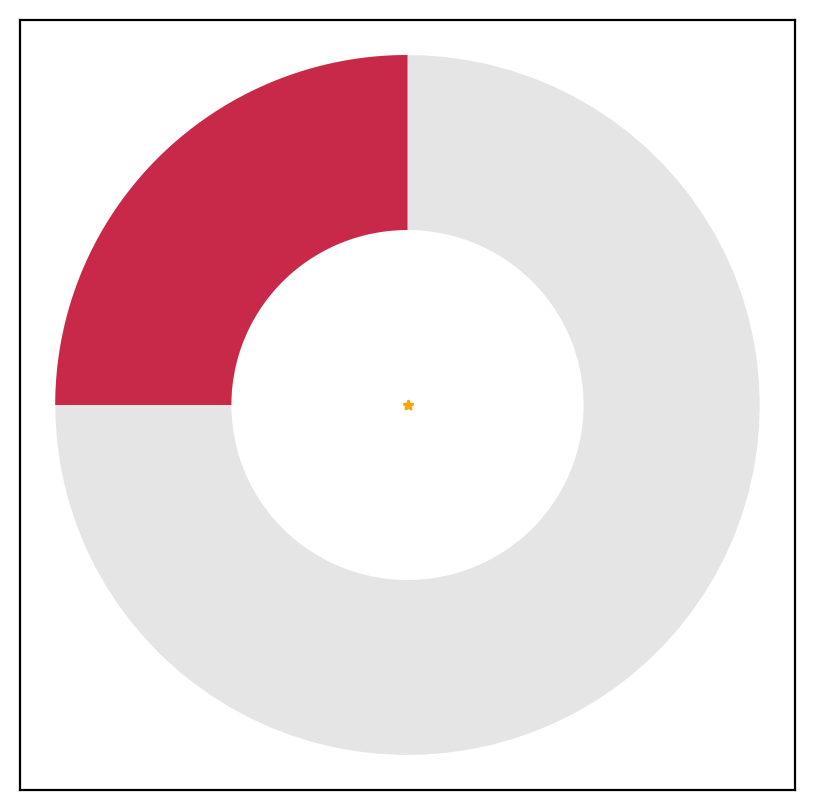

In [39]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
radii = [1, 2]
angle = np.linspace(np.pi/2, np.pi, 100)
xs = np.outer(radii, np.cos(angle))
ys = np.outer(radii, np.sin(angle))

xs[1,:] = xs[1,::-1]
ys[1,:] = ys[1,::-1]
ax.fill(np.ravel(xs), np.ravel(ys), lw=0, color="crimson")

angle = np.linspace(0, 2*np.pi, 100)
xs = np.outer(radii, np.cos(angle))
ys = np.outer(radii, np.sin(angle))

xs[1,:] = xs[1,::-1]
ys[1,:] = ys[1,::-1]
ax.fill(np.ravel(xs), np.ravel(ys), lw=0, color="gray", alpha=0.2)
ax.scatter(0,0, marker="*", s=10, color="orange")
ax.set_yticks([])
ax.set_xticks([])
ax.set_xlim(-2.2,2.2)
ax.set_ylim(-2.2,2.2)

plt.show()

The illuminated section depends on the distribution of the dust.

[Xu et al 1994](https://articles.adsabs.harvard.edu/pdf/1994ApJ...435..274X)

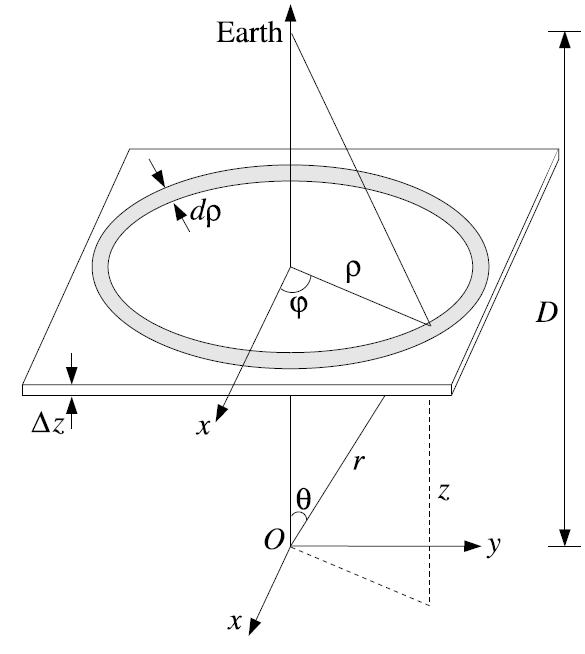

Given an optically thin dust sheet, the total scattered flux at time t and wavelength $λ$ is:

$F_{sc}(λ, t)$ = $∫ da d^3\bf{r}$ $n_d(\bf{r}, a)$ $\frac{1}{4 \pi d^2}$ $\left[Q_{sc}(λ, a) σ_g\right]$ $\frac{L_{SN}(λ,\tilde{t})}{4 \pi r^2}$ $\phi(\mu, λ, a)$

$\phi(\mu, λ, a) = \frac{1 - g^2(λ,a)}{\left[1 + g^2(λ,a) - 2g(λ,a)\mu\right]^{3/2}}$

$\mu = 1- \frac{c(t - \tilde{t})}{r}$ = $\cos$θ = $\frac{z}{r}$

*   $d$: Distance SN to observer.
*   $r$: Distance SN to dust; x,y,z position.
*   $\tilde{t}$: time at the dust position.
*   $t$: time ellapsed since SN1987's peak brightness.
*   $n_d(\bf{r}, a)$: dust grain density of radius $a$ at $\bf{r}$.
*   $Q_{sc}(λ, a)$: dust absorption/emission efficiency.
*   $σ_g$: geometry cross section.
*   $L_{SN}(λ,\tilde{t})$: SN luminosity at $λ$ and $\tilde{t}$.
*   $\phi(\mu, λ, a)$: scattering phase function.
*   $\theta$: scattering angle.

From [Chevalier 1986](https://articles.adsabs.harvard.edu/pdf/1986ApJ...308..225C):

$g = \tilde{\cosθ}$, measure of the degree of forward scattering

  $g = 0$: isotropic scattering.

  $g = 1$: completely forward scattering.






## Flux for a dust concentrates in a thin sheet

At a certain time t, r and θ are determined within the uncertainty arising from SN1987A's 100 day burst.

$\Delta t = 100$ days

$\mu = 1- \frac{c(t - \tilde{t})}{r}$ = $\cos$θ = $\frac{z}{r}$

$1- \frac{c(t - \tilde{t})}{r} = \frac{z}{r}$,

$r = \sqrt{ρ^2 + z^2} = \sqrt{x^2 + y^2 + z^2}$,

$z = r - c(t - \tilde{t})$,

$d\tilde{t} = \frac{-\rho d\rho}{c (ρ^2 + z^2)^{1/2}} = \frac{-\rho d\rho}{cr}$.

Replace in the flux integral

$F_{sc}(λ, t)$ = $∫ da d^3\bf{r}$ $n_d(\bf{r}, a)$ $\frac{1}{4 \pi d^2}$ $\left[Q_{sc}(λ, a) σ_g\right]$ $\frac{L_{SN}(λ,\tilde{t})}{4 \pi r^2}$ $\phi(\mu, λ, a)$

$=$$∫ d^3\bf{r}$ $n_d(\bf{r}, a)$ $L_{SN}(λ,\tilde{t})$ $=$ $∫ \rho d\rho d\phi dz$ $n_d(\rho, \phi, z, a)$ $L_{SN}(λ,\tilde{t})$

Replace $d\rho$ for $d\tilde{t}$ and integrate over $z$:

$=$$\Delta z \int (\frac{-d\tilde{t}}{\rho}cr)\rho d \phi $$n_d(\rho, \phi, z, a)$ $L_{SN}(λ,\tilde{t})$

$=$$-\Delta z cr \int d\phi $$n_d(\rho, \phi, z, a)$ $\int L_{SN}(λ,\tilde{t})d\tilde{t}$

$=$$-\Delta z cr L_{SN}(λ) \int d\phi $$n_d(r, \phi, \theta, a)$


$F_{sc}(λ, t)$ = $\frac{L_{SN}(λ)}{4 \pi d^2}\frac{\Delta z c}{4\pi r}$
$∫ da \left[Q_{sc}(λ, a) σ_g\right] \phi(\mu, λ, a)\int d\phi $$n_d(\rho, \phi, \theta, a)$

$F_{SN}(λ) = \frac{L_{SN}(λ)}{4\pi d^2}$, $n_d(\mathbf{r}, a) = n_d({\mathbf{r}}) f(a)$ and

$F_{SC}(λ, t) = \int_0^{2\pi} F_{SC}(λ,t,\phi)d\phi$.

Then

$\frac{F_{sc}(λ, t, \phi)}{F_{SN}(\lambda)} = \frac{\Delta z c}{4\pi r}n_d(\rho, \phi, \theta)∫ da \left[Q_{sc}(λ, a) σ_g\right] \phi(\mu, λ, a) f(a)$

## Surface Brightness

$F_{SC}(λ,t) = \int B_{SC}(λ, t, \phi)\rho \Delta \rho d\phi$,

$\Delta \rho$: intrinsic width due to the finite burst duration and the thickness of the dust shell.

$\frac{d F_{SC}(λ,t)}{d\phi} = F_{SC}(λ,t,\phi) = B_{SC}(λ, t, \phi)\rho \Delta \rho$

$\frac{B_{SC}(λ, t, \phi)\rho \Delta \rho}{F_{SN}(\lambda)} = \frac{\Delta z c}{4\pi r}n_d(\rho, \phi, \theta)∫ da \left[Q_{sc}(λ, a) σ_g\right] \phi(\mu, λ, a) f(a)$

$\frac{B_{sc}(λ, t, \phi)}{F_{SN}(\lambda)}= \frac{\Delta z c}{4\pi r}\frac{1}{\rho \Delta \rho}n_d(\rho, \phi, \theta)∫ da \left[Q_{sc}(λ, a) σ_g\right] \phi(\mu, λ, a) f(a)$





The idea is to have a picewise function for the number density, that only depends on the angle $\phi$ the angle in the sky plane

$n_d(\rho, \phi, \theta) = n_d(\theta) =   \left\{
\begin{array}{ll}
      n_{H} & 15 \leq \phi \leq 30 \\
      0 & otherwise\\
\end{array}
\right.$

$B_{sc}(λ, t, \phi)= \frac{L_{SN}(λ)}{4 \pi d^2}\frac{\Delta z c}{4\pi r}\frac{1}{\rho \Delta \rho}n_d(\phi)\left[Q_{sc}(λ) σ_g\right] \phi(\mu, λ)$

In [68]:
Deltat = [300] # days
dtoy = 0.00273973 # 1 day = 0.00273973 y
Deltat_y = np.array(Deltat) * dtoy
z0 = [-0.10, 0, 0.3, 1] # pc
pctoly = 3.26156 # 1pc = 3.26156 light-year
z0ly = np.array(z0) * pctoly
# -- point where the plane-parallel slab of dust intersects the line of sight
# -- inclination of the plane, is perpendicular to the line of sight (I am using 89 so the tangent don't die)
alpha = 0.0*np.pi/180  # angle of tilt in radians
a = np.tan(alpha)
dt0 = 50 * dtoy

pctom = 3.086e+16
n = 2.3 * (100 ** 3) #m-3
n = n * ( pctom ** 3 ) / ( pctoly ** 3 )
sigma = 5e-22 / (100 ** 2) #m2 #RR paper
sigma = ( sigma / ( (pctom ** 2) ) ) * ( pctoly ** 2 )
albedo = 0.6
Fphi = 1/4 * np.pi
dkpc = 5 #kpc
d = dkpc * 1000 * pctoly
k = n * sigma * albedo * Fphi
# L = 15,000 x 3.9e26 # watts = kg m ^2 / s^3
L = (15000 * 3.9e36) * ((60 * 60 * 24 * 365) ** 3) * (pctoly ** 2) / (pctom ** 2)
Ir = k * L / (4 * np.pi * (dkpc * 1000 * pctoly)**2)

# angle = np.linspace(0, 2*np.pi, 100)
# surface = np.zeros((len(Deltat_y), len(z0ly), 100))


def surface_brightness_plane(Deltat_y, z0ly, dz0, theta_min = 0, theta_max = 2*np.pi):
  """
    Arguments
        Deltat_y: time when the snap of the LE is taken by observer, in year
        z0ly: sitance of the dust in light-years
        dz0: thickness of the plane dust
        theta_min: inferior limit where the dust is located in the sky plane
        theta_max: superior limit where the dust is located in the sky plane
  """
  theta = np.linspace(theta_min, theta_max, 100)
  surface = np.zeros((len(Deltat_y), len(z0ly), 100))
  for j, time in enumerate(Deltat_y):
    ct = time * c
    for i, z in enumerate(z0ly):
      if z < 0:
        ti = (-2 * z)/(c * (1 + a**2))
        # print(ti)
        if time >= ti:
          r_le = np.sqrt(2 * z * ct + (ct)**2 * (1 + a**2) )
          x = r_le * np.cos(theta) - a * ct
          # print(len(x), len(theta))
          surface[j, i, :] = Ir * dz0 / ((z - a * x + ct)**2)
        else:
          surface[j, i, :] = Ir * np.zeros(len(theta))
      else:
        ti = 0
        if time >= 0:
          r_le = np.sqrt(2 * z * ct + (ct)**2 * (1 + a**2))
          x = r_le * np.cos(theta) - a * ct
          surface[j, i, :] = Ir * dz0 / ((z - a * x + ct)**2)
    return surface

In [42]:
theta_min = np.pi/3
theta_max = 80*np.pi/180
surface = surface_brightness_plane(Deltat_y, z0ly, dz0, theta_min, theta_max)

mean = []
std = []
for j, time in enumerate(Deltat_y):
  for i, z in enumerate(z0ly):
    if np.mean(surface[j, i, :]) != 0:
      # print(np.mean(np.log(surface[j, i, :])))
      mean.append(np.mean(np.log(surface[j, i, :])))
      std.append(np.std(np.log(surface[j, i, :])))
    else:
      mean.append(np.mean(surface[j, i, :]))
      std.append(np.std(surface[j, i, :]))

surface_norm = (mean - np.min(mean)) / (np.max(mean) - np.min(mean))
surface_norm = np.array(surface_norm).reshape(len(Deltat),len(z0ly))

In [43]:
surface.shape

(1, 4, 100)

In [44]:
np.mean(surface, axis=2)

array([[8.34546688e+17, 3.03627302e+17, 6.32800951e+16, 1.23009374e+16]])

In [45]:
# surface

In [46]:
surface_norm

array([[1.        , 0.76024743, 0.38838334, 0.        ]])

In [47]:
def r_outin(z, ct, dz0, dt0, a, inout):
    if inout == "out":
      size = 1
    else:
      size = -1
    r_le_outin = np.sqrt(2 * z * ct + (ct)**2 * (1 + a**2) + (size) * 2 * (dz0 / 2) * ct)
    # -- include the thickness in xy plane
    r_le_outin = r_le_outin + (size) * (2 * dz0 * ct + 2 * z * c * (dt0) + 2 * ct * (dt0) * (1 + a**2)) / (r_le_outin * 4 )
    # -- in arcseconds 5kpc = 16308 ly
    # -- degree to arcseconds
    r_le_outin = np.arctan(r_le_outin / d) * (180 / np.pi) * 3600

    return r_le_outin


def xy_plane_ring(angle, z, ct, dz0, dt0, a, d):
    """
      x and y coordinates in the sky plane of the LE ring. When the dust is a plane.

      Arguments:
        angle: angle in the sky plane where the LE is define
        z: position of the dust plane in ly
        ct: time when the "snap" of the LE is taken from the observer in years
        dz0: thickness of the dust plane in ly
        dt0: duration of the flash light (source) in yeaars
        a: tan(alpha) -  alpha: angle between the normal of the dust plane and the line of sight (z axis)
        d: distance in ly between the source and the obsever

      Returns:
        xs, ys: x and y position in the sky plane in arcseconds

    """
    # -- radii LE ring as seen by z including the thickness of 0.02
    r_le_out = r_outin(z, ct, dz0, dt0, a, "out")
    # -- radii LE ring as seen by z including the thickness of 0.02
    r_le_in = r_outin(z, ct, dz0, dt0, a, "in")
    radii = [r_le_out, r_le_in]
    xs = np.outer(radii, np.cos(angle)) - a * ct
    ys = np.outer(radii, np.sin(angle))
    # in order to have a closed area, the circles
    # should be traversed in opposite directions
    xs[1,:] = xs[1,::-1]
    ys[1,:] = ys[1,::-1]

    return xs, ys


def plot_plane_dust(ax, d, xs, ys, z, surface_norm, j, i):
    ax.set_xlim(np.arctan(-4/d) * (180 / np.pi) * 3600 , np.arctan(4/d) * (180 / np.pi) * 3600)
    ax.set_ylim(np.arctan(-4/d) * (180 / np.pi) * 3600 , np.arctan(4/d) * (180 / np.pi) * 3600)
    ax.fill(np.ravel(xs), np.ravel(ys), lw=0, color=cmap(normalize(surface_norm[j,i])), label="%s"%(z/pctoly))
    # ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05), ncol=4)

    return ax

In [48]:
surface_norm

array([[1.        , 0.76024743, 0.38838334, 0.        ]])

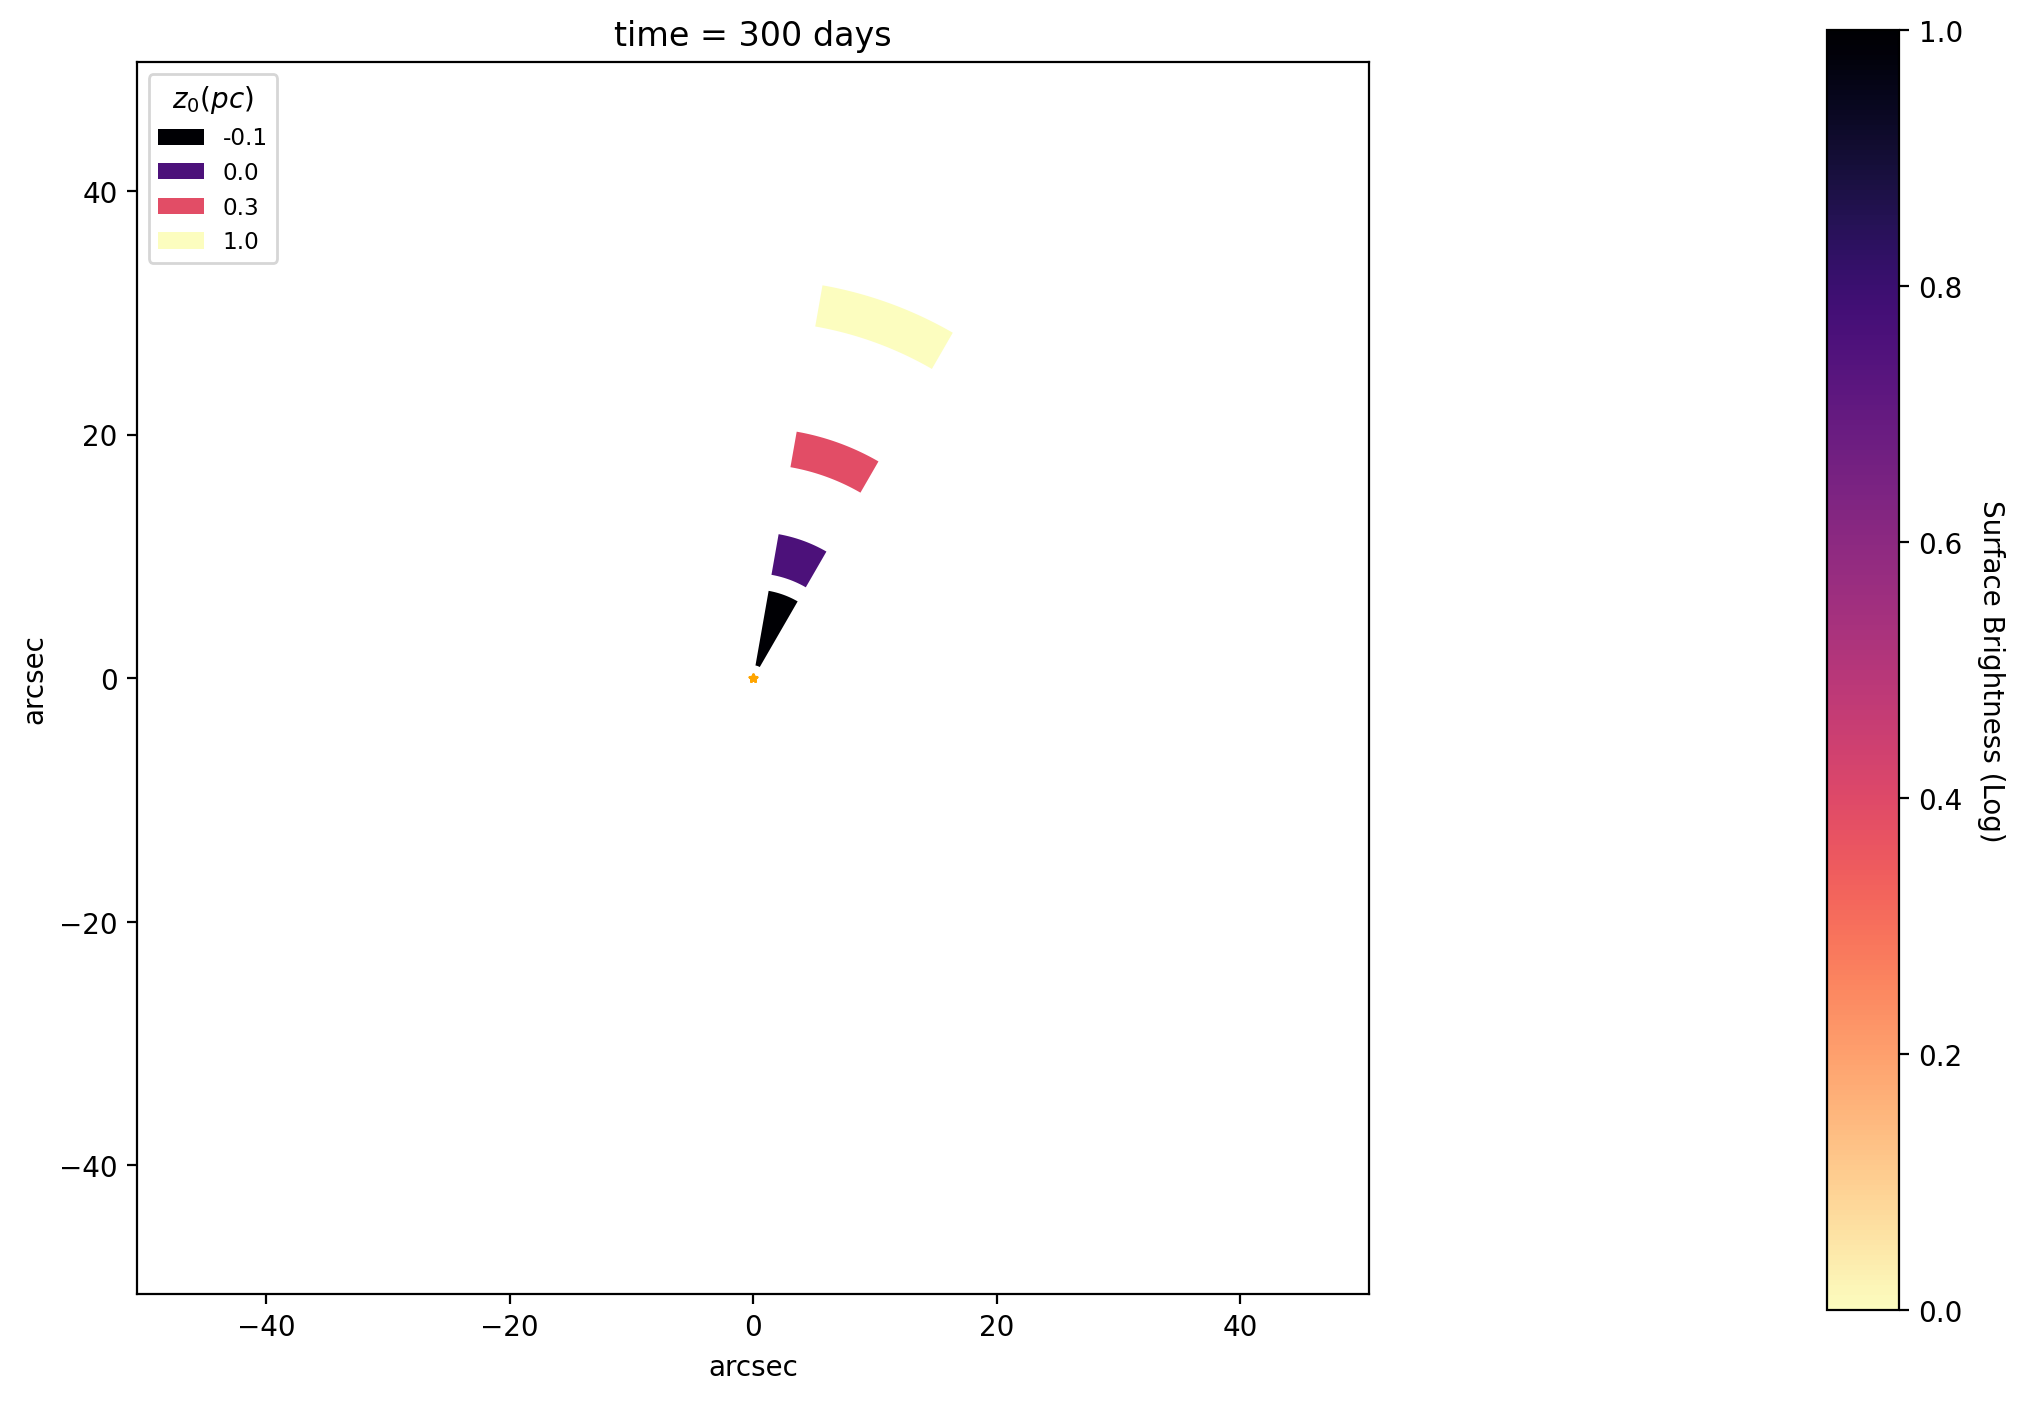

In [49]:
angle = np.linspace(theta_min, theta_max, 100)
cmap = matplotlib.colormaps.get_cmap('magma_r')
nonzero = [np.mean(surface, axis=2) != 0]
surface_norm_nonzero = surface_norm[tuple(nonzero)]
normalize = matplotlib.colors.Normalize(vmin=surface_norm_nonzero.min(), vmax=surface_norm_nonzero.max())

XX = []
YY = []
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
for j, time in enumerate(Deltat_y):
  ct = time*c
  ax.set_title("time = %s days"%int(time/ dtoy))
  for i,z in enumerate(z0ly):
      if z < 0:
        # -- time ring star expanding
        ti = (-2 * z)/(c * (1 + a**2))
        # print(ti)
        if time >= ti:
          xs, ys = xy_plane_ring(angle, z, ct, dz0, dt0, a, d)
          XX.append(xs)
          YY.append(ys)
          plot_plane_dust(ax, d, xs, ys, z, surface_norm, j, i)
          ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05), ncol=4)
        else:
          ax.scatter(-a * ct,0, marker="*", s=7, color="orange")
      else:
        ti = dt0
        # -- for time less than the duration of the flash light, all the dust within the paraboiloid define for the dust and the source would be illuminated.
        if time <= ti:
          # -- rin and rout for the most inner ring keeps the same
          index = [k for k, x in enumerate(z0ly) if x >= 0]
          if i == index[0]:
            print(i, z0ly[i] / pctoly)
            xs, ys = xy_plane_ring(angle, z, ct, dz0, dt0, a, d)
            XX.append(xs)
            YY.append(ys)
            plot_plane_dust(ax, d, xs, ys, z, surface_norm, j, i)
            ax.scatter(-a * ct,0, marker="*", s=7, color="orange")
            ax.legend(loc='upper left', ncol=1, fontsize='small', title = r"$z_0 (pc)$")
          else:
            # -- for the rest of the rings, rin is rout of the previous ring
            r_le_out = r_outin(z, ct, dz0, dt0, a, "out")
            r_le_in = r_outin(z0ly[i-1], ct, dz0, dt0, a, "out")
            print(z / pctoly, z0ly[i-1] / pctoly, r_le_out, r_le_in)
            radii = [r_le_out, r_le_in]
            xs = np.outer(radii, np.cos(angle)) - a * ct
            ys = np.outer(radii, np.sin(angle))
            # in order to have a closed area, the circles
            # should be traversed in opposite directions
            xs[1,:] = xs[1,::-1]
            ys[1,:] = ys[1,::-1]
            XX.append(xs)
            YY.append(ys)
            plot_plane_dust(ax, d, xs, ys, z, surface_norm, j, i)
            ax.scatter(-a * ct,0, marker="*", s=7, color="orange")
            ax.legend(loc='upper left', ncol=1, fontsize='small', title = r"$z_0 (pc)$")
        elif time > ti:
          xs, ys = xy_plane_ring(angle, z, ct, dz0, dt0, a, d)
          XX.append(xs)
          YY.append(ys)
          plot_plane_dust(ax, d, xs, ys, z, surface_norm, j, i)
          ax.scatter(-a * ct,0, marker="*", s=7, color="orange")
          ax.legend(loc='upper left', ncol=1, fontsize='small', title = r"$z_0 (pc)$")



cbax = fig.add_axes([0.96, 0.1, 0.03, 0.80])

ax.set_xlabel("arcsec")
ax.set_ylabel("arcsec")
ax.set_box_aspect(1)

cb = matplotlib.colorbar.ColorbarBase(cbax, cmap=cmap, norm=normalize, orientation='vertical')
cb.set_label("Surface Brightness (Log)", rotation=270, labelpad=15)

# def label_cbrt(x,pos):
#     return "{:.1f}".format(np.log10(np.exp((( x * (np.max(mean) - np.min(mean)) )+ (np.min(mean)) ))))

def label_cbrt(x,pos):
    return "{:.1f}".format(x)

cb.formatter = matplotlib.ticker.FuncFormatter(label_cbrt)
cb.update_ticks()
# plt.tight_layout()
# plt.savefig("figure2.png", dpi = 700, bbox_inches='tight')

plt.show()

In [50]:
XX[0].shape

(2, 100)

# longitude to ra

HA* = LST* − RA*

Hour Angle of Star = Local Sidereal Time - Right Asention Star

GHA* = HA* + λ

Hour Angle Greenwich Star = Hour Angle Star + longitude

western longitude λ > 0

RA* = LST* - HA*

RA* = LST* - (GHA* - λ)


https://astronavigationdemystified.com/converting-gmt-to-gha/

GHA = GMT - (mean solar time – apparent solar time)?

In [51]:
# from astropy.time import Time
# from astropy.coordinates import EarthLocation

# # Observer's location (latitude and longitude)
# observer_latitude = 42.39194444444444
# observer_longitude = 72.34416666666667
# observer_location = EarthLocation(lat=observer_latitude, lon=observer_longitude)
# time_of_observation = Time.now()  # You can provide a specific time here if needed
# lst_apparent = time_of_observation.sidereal_time('apparent', 'greenwich')
# lst_mean = time_of_observation.sidereal_time('mean', 'greenwich')
# GMT = -5(u.hour)


In [52]:
def convert_xyz_galactic(X,Y):
  # Observer's location (latitude and longitude) of the Five College Radio Astronomy Observatory CO Survey
  observer_latitude = 42.39194444444444
  observer_longitude = 72.34416666666667
  # 42°23′31″N 72°20′39″W

  observer_location = EarthLocation(lat=observer_latitude*u.deg, lon=observer_longitude*u.deg)
  # https://astronomy.stackexchange.com/questions/1028/calculation-of-right-ascension-and-declination
  time_of_observation = Time.now()  # You can provide a specific time here if needed
  lst = time_of_observation.sidereal_time('mean', observer_longitude)

  # Convert x, y, z to spherical coordinates
  cartesian_coords = CartesianRepresentation(x=np.ravel(X), y=np.ravel(Y), z=np.ones(len(np.ravel(Y)))*(1 * (180 / np.pi) * 3600))
  spherical_coords = cartesian_coords.represent_as(SphericalRepresentation)

  # Calculate Declination (DEC)
  dec = spherical_coords.lat.to(u.deg)

  # Calculate Right Ascension (RA)************
  ra = lst - spherical_coords.lon.to(u.deg)/15

  # # Create SkyCoord object with RA and DEC
  sky_coord = SkyCoord(ra=ra, dec=dec, frame='icrs')

  galacticcoord = sky_coord.transform_to(Galactic())

  return galacticcoord

In [53]:
# observer_latitude = 42.39194444444444
# observer_longitude = 72.34416666666667
# # 42°23′31″N 72°20′39″W

# observer_location = EarthLocation(lat=observer_latitude*u.deg, lon=observer_longitude*u.deg)
# # https://astronomy.stackexchange.com/questions/1028/calculation-of-right-ascension-and-declination
# time_of_observation = Time.now()  # You can provide a specific time here if needed
# lst = time_of_observation.sidereal_time('mean', observer_longitude)

# # Convert x, y, z to spherical coordinates
# cartesian_coords = CartesianRepresentation(x=np.ravel(XX[0]), y=np.ravel(XX[0]), z=np.ones(len(np.ravel(YY[0])))*(1 * (180 / np.pi) * 3600))
# spherical_coords = cartesian_coords.represent_as(SphericalRepresentation)

# # Calculate Declination (DEC)
# dec = spherical_coords.lat.to(u.deg)

# # Calculate Right Ascension (RA)
# ra = lst - spherical_coords.lon.to(u.deg)/15

In [54]:
# np.arctan(r_le_outin / d) * (180 / np.pi) * 3600

In [55]:
galacticcoord = []

for i in range(len(XX)):
  XX_X = np.tan( XX[i] / ((180 / np.pi) * 3600) ) * d
  YY_Y = np.tan( YY[i] / ((180 / np.pi) * 3600) ) * d
  galacticcoord.append(convert_xyz_galactic(XX_X,YY_Y))

In [56]:
for i in range(4):
  print(i, i//2)

0 0
1 0
2 1
3 1


In [57]:
surface_norm.shape

(1, 4)

[27.12888299] [27.12822132]
[122.92850814] [122.92873551]
[27.12888298] [27.12822131]
[122.92850814] [122.92873551]
[27.12888297] [27.12822128]
[122.92850814] [122.92873551]
[27.12888296] [27.12822125]
[122.92850814] [122.92873551]


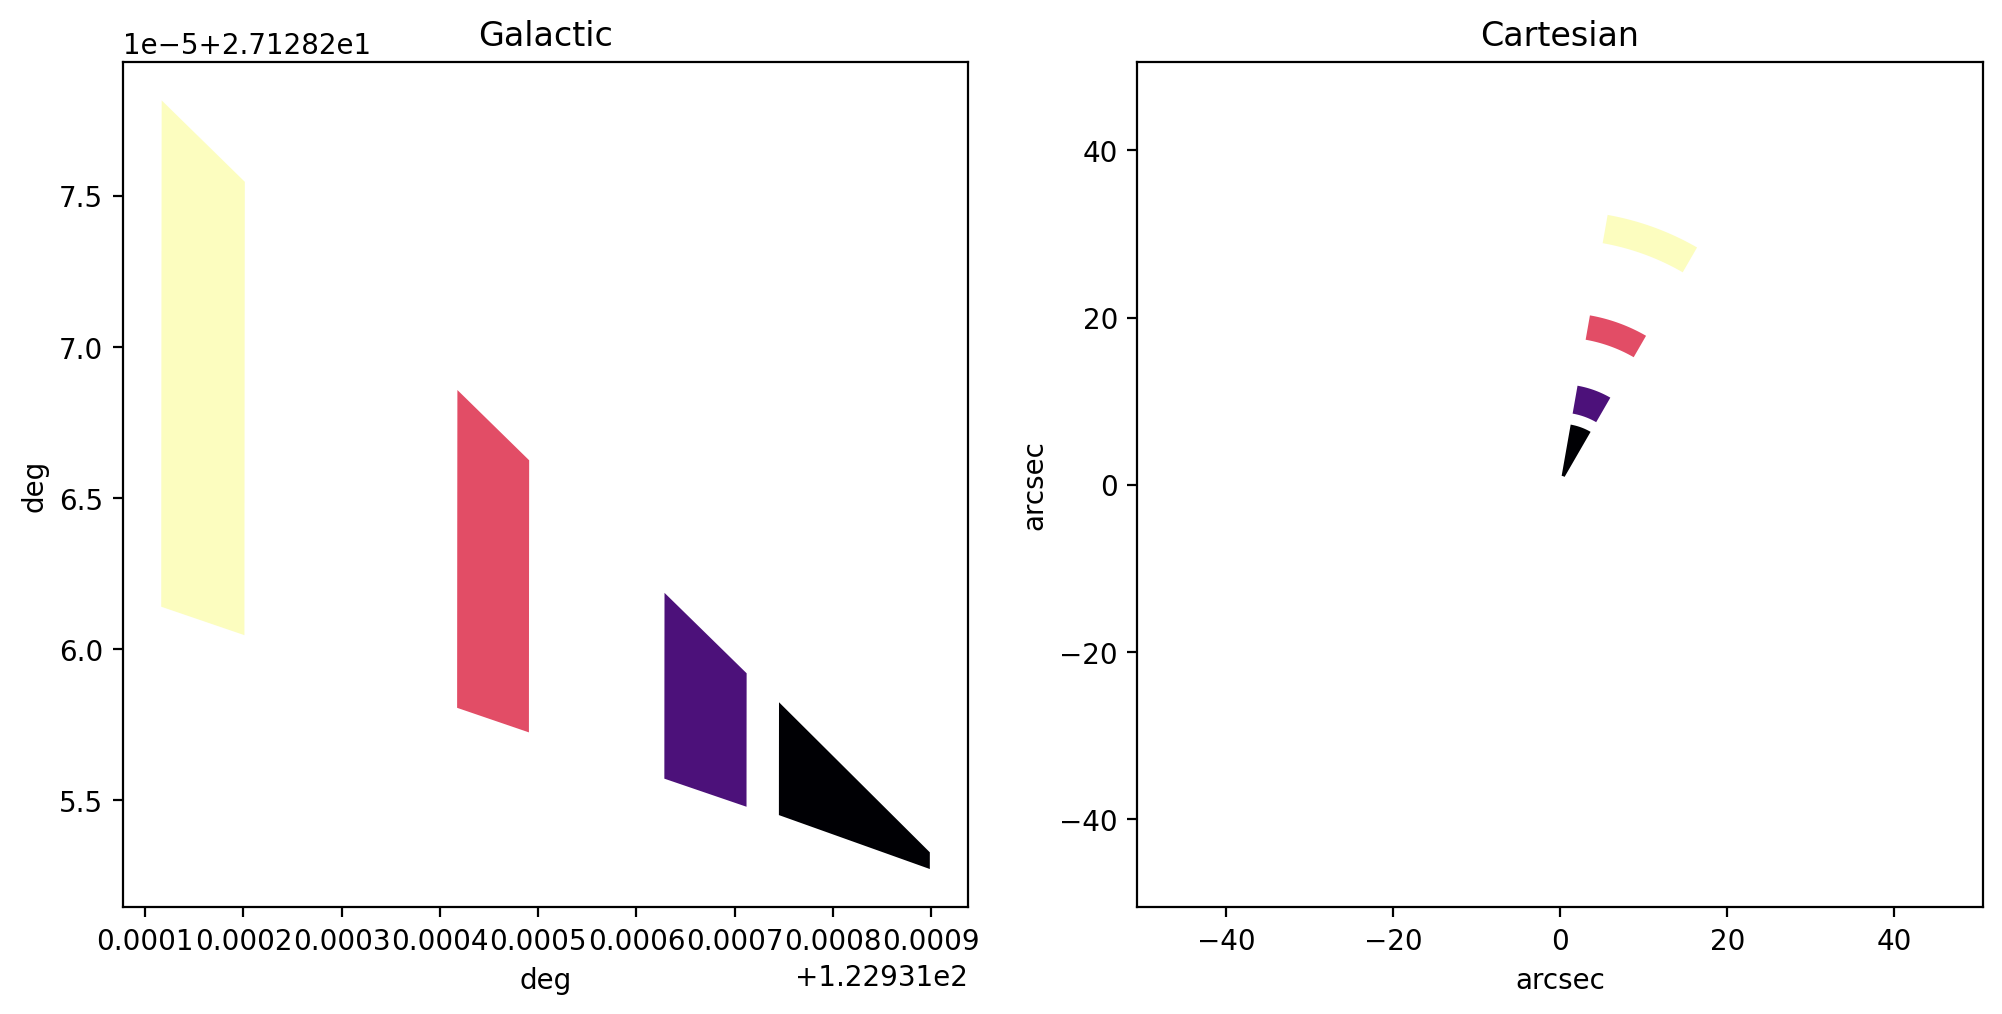

In [58]:
fig, ax = plt.subplots(1, 2, figsize=(12, 8))
# ax.set_xlim(np.arctan(-4/d) * (180 / np.pi) * 3600 , np.arctan(4/d) * (180 / np.pi) * 3600)
# ax.set_ylim(np.arctan(-4/d) * (180 / np.pi) * 3600 , np.arctan(4/d) * (180 / np.pi) * 3600)
for i in range(len(galacticcoord)):
  ax[0].fill(galacticcoord[i].l.value, galacticcoord[i].b.value, lw=0, color=cmap(normalize(surface_norm[0,i])), label="%s"%(z0ly[i]/pctoly))
  ax[0].set_title("Galactic")
  ax[1].fill(np.ravel(XX[i]), np.ravel(YY[i]), lw=0, color=cmap(normalize(surface_norm[0,i])), label="%s"%(z0ly[i]/pctoly))
  ax[1].set_title("Cartesian")
  ax[1].set_xlabel("arcsec")
  ax[1].set_ylabel("arcsec")
  ax[1].set_xlim(np.arctan(-4/d) * (180 / np.pi) * 3600 , np.arctan(4/d) * (180 / np.pi) * 3600)
  ax[1].set_ylim(np.arctan(-4/d) * (180 / np.pi) * 3600 , np.arctan(4/d) * (180 / np.pi) * 3600)
  ax[0].set_xlabel("deg")
  ax[0].set_ylabel("deg")
  ax[1].set_box_aspect(1)
  ax[0].set_box_aspect(1)
  lmin = convert_xyz_galactic(np.tan( -100 / ((180 / np.pi) * 3600) ) * d, np.tan( -100 / ((180 / np.pi) * 3600) ) * d).l.value
  lmax = convert_xyz_galactic(np.tan( 100 / ((180 / np.pi) * 3600) ) * d, np.tan( 100 / ((180 / np.pi) * 3600) ) * d).l.value + 0.0003

  bmin = convert_xyz_galactic(np.tan( -100 / ((180 / np.pi) * 3600) ) * d, np.tan( -100 / ((180 / np.pi) * 3600) ) * d).b.value
  bmax = convert_xyz_galactic(np.tan( 200 / ((180 / np.pi) * 3600) ) * d, np.tan( 200 / ((180 / np.pi) * 3600) ) * d).b.value
  print(bmin, bmax)
  print(lmin, lmax)
  # lmin = 122.9
  # lmax = 123.0
  # bmin = 27.12
  # bmax = 27.13
  # ax[0].set_xlim(lmin, lmax)
  # ax[0].set_ylim(bmin, bmax)

  #,
#, color=cmap(normalize(surface_norm[j,i])), label="%s"%(z/pctoly))

In [59]:
galacticcoord[3].b.value.max()

27.128278153016083

In [60]:
testx = np.ravel(XX[0])[np.ravel(XX[0])>0]
testy = np.ravel(YY[0])[np.ravel(YY[0])>0]


In [61]:
XX[0].shape

(2, 100)

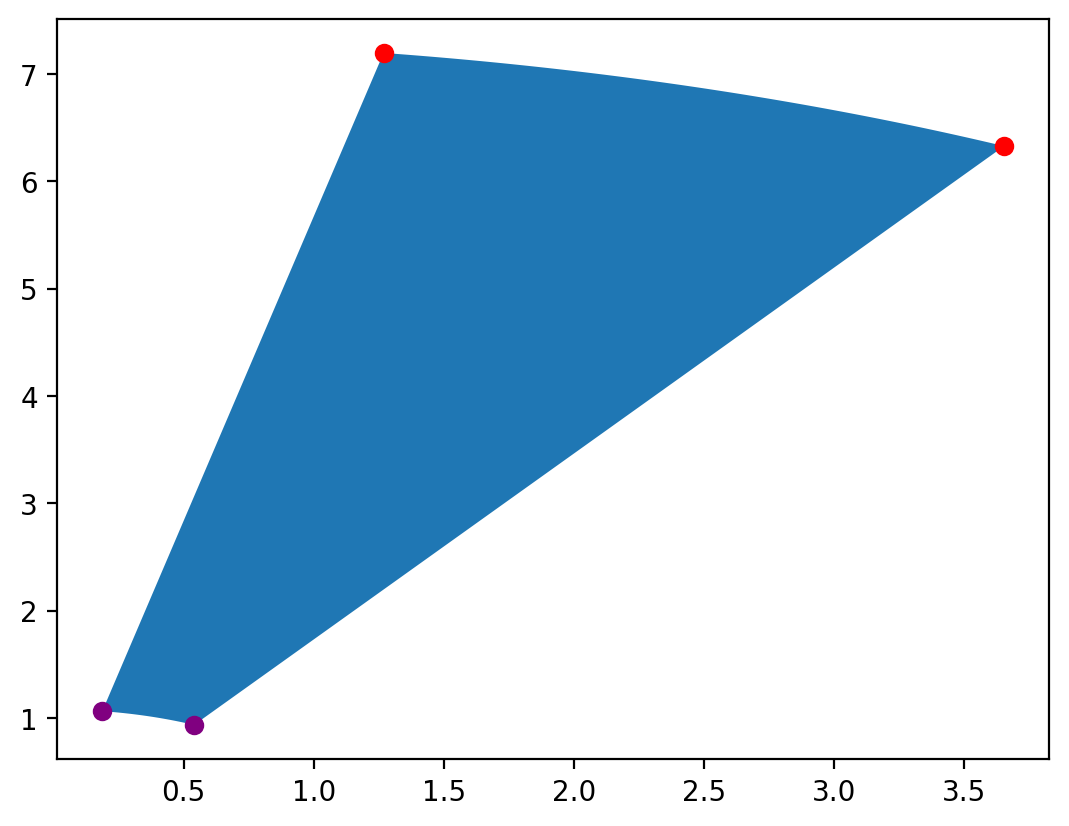

In [62]:
plt.fill(testx, testy, lw=0)
# plt.xlim(np.arctan(-4/d) * (180 / np.pi) * 3600 , np.arctan(4/d) * (180 / np.pi) * 3600)
# plt.ylim(np.arctan(-4/d) * (180 / np.pi) * 3600 , np.arctan(4/d) * (180 / np.pi) * 3600)
plt.scatter(testx[:int(XX[0].shape[1])].min(), testy[:100][np.argmin(testx[:int(XX[0].shape[1])])], color="red")
plt.scatter(testx[:int(XX[0].shape[1])].max(), testy[:100][np.argmax(testx[:int(XX[0].shape[1])])], color="red")

plt.scatter(testx[int(XX[0].shape[1]):].min(), testy[100:][np.argmin(testx[int(XX[0].shape[1]):])], color="purple")
plt.scatter(testx[int(XX[0].shape[1]):].max(), testy[100:][np.argmax(testx[int(XX[0].shape[1]):])], color="purple")
# plt.scatter(testx.min(), testy.max())
# plt.scatter(testx.max(), testy.max())


In [63]:
def identify_4_corner(XX, YY):
  """
    For now I am asuming that there are only 4 corners, define by the outher and inner radius of the LE

    Arguments:
      XX, YY: the x and y components from the function xy_plane_ring(angle, z, ct, dz0, dt0, a, d)

    returns:
      the x,y for each of the 4 corners per dust plane
  """
  corners = []
  for i, j in zip(XX, YY):
    testx = np.ravel(i)[np.ravel(i)>0]
    testy = np.ravel(j)[np.ravel(j)>0]
    length = int(i.shape[1])
    x1, y1 = testx[:length].min(), testy[:length][np.argmin(testx[:length])]
    x2, y2 = testx[:length].max(), testy[:length][np.argmax(testx[:length])]
    x3, y3 = testx[length:].min(), testy[length:][np.argmin(testx[length:])]
    x4, y4 = testx[length:].max(), testy[length:][np.argmax(testx[length:])]
    corners.append([[x1, y1], [x2, y2], [x3, y3], [x4, y4]])
  return corners

In [64]:
corners = identify_4_corner(XX, YY)

In [65]:
len(galacticcoord), len(corners)

(4, 4)

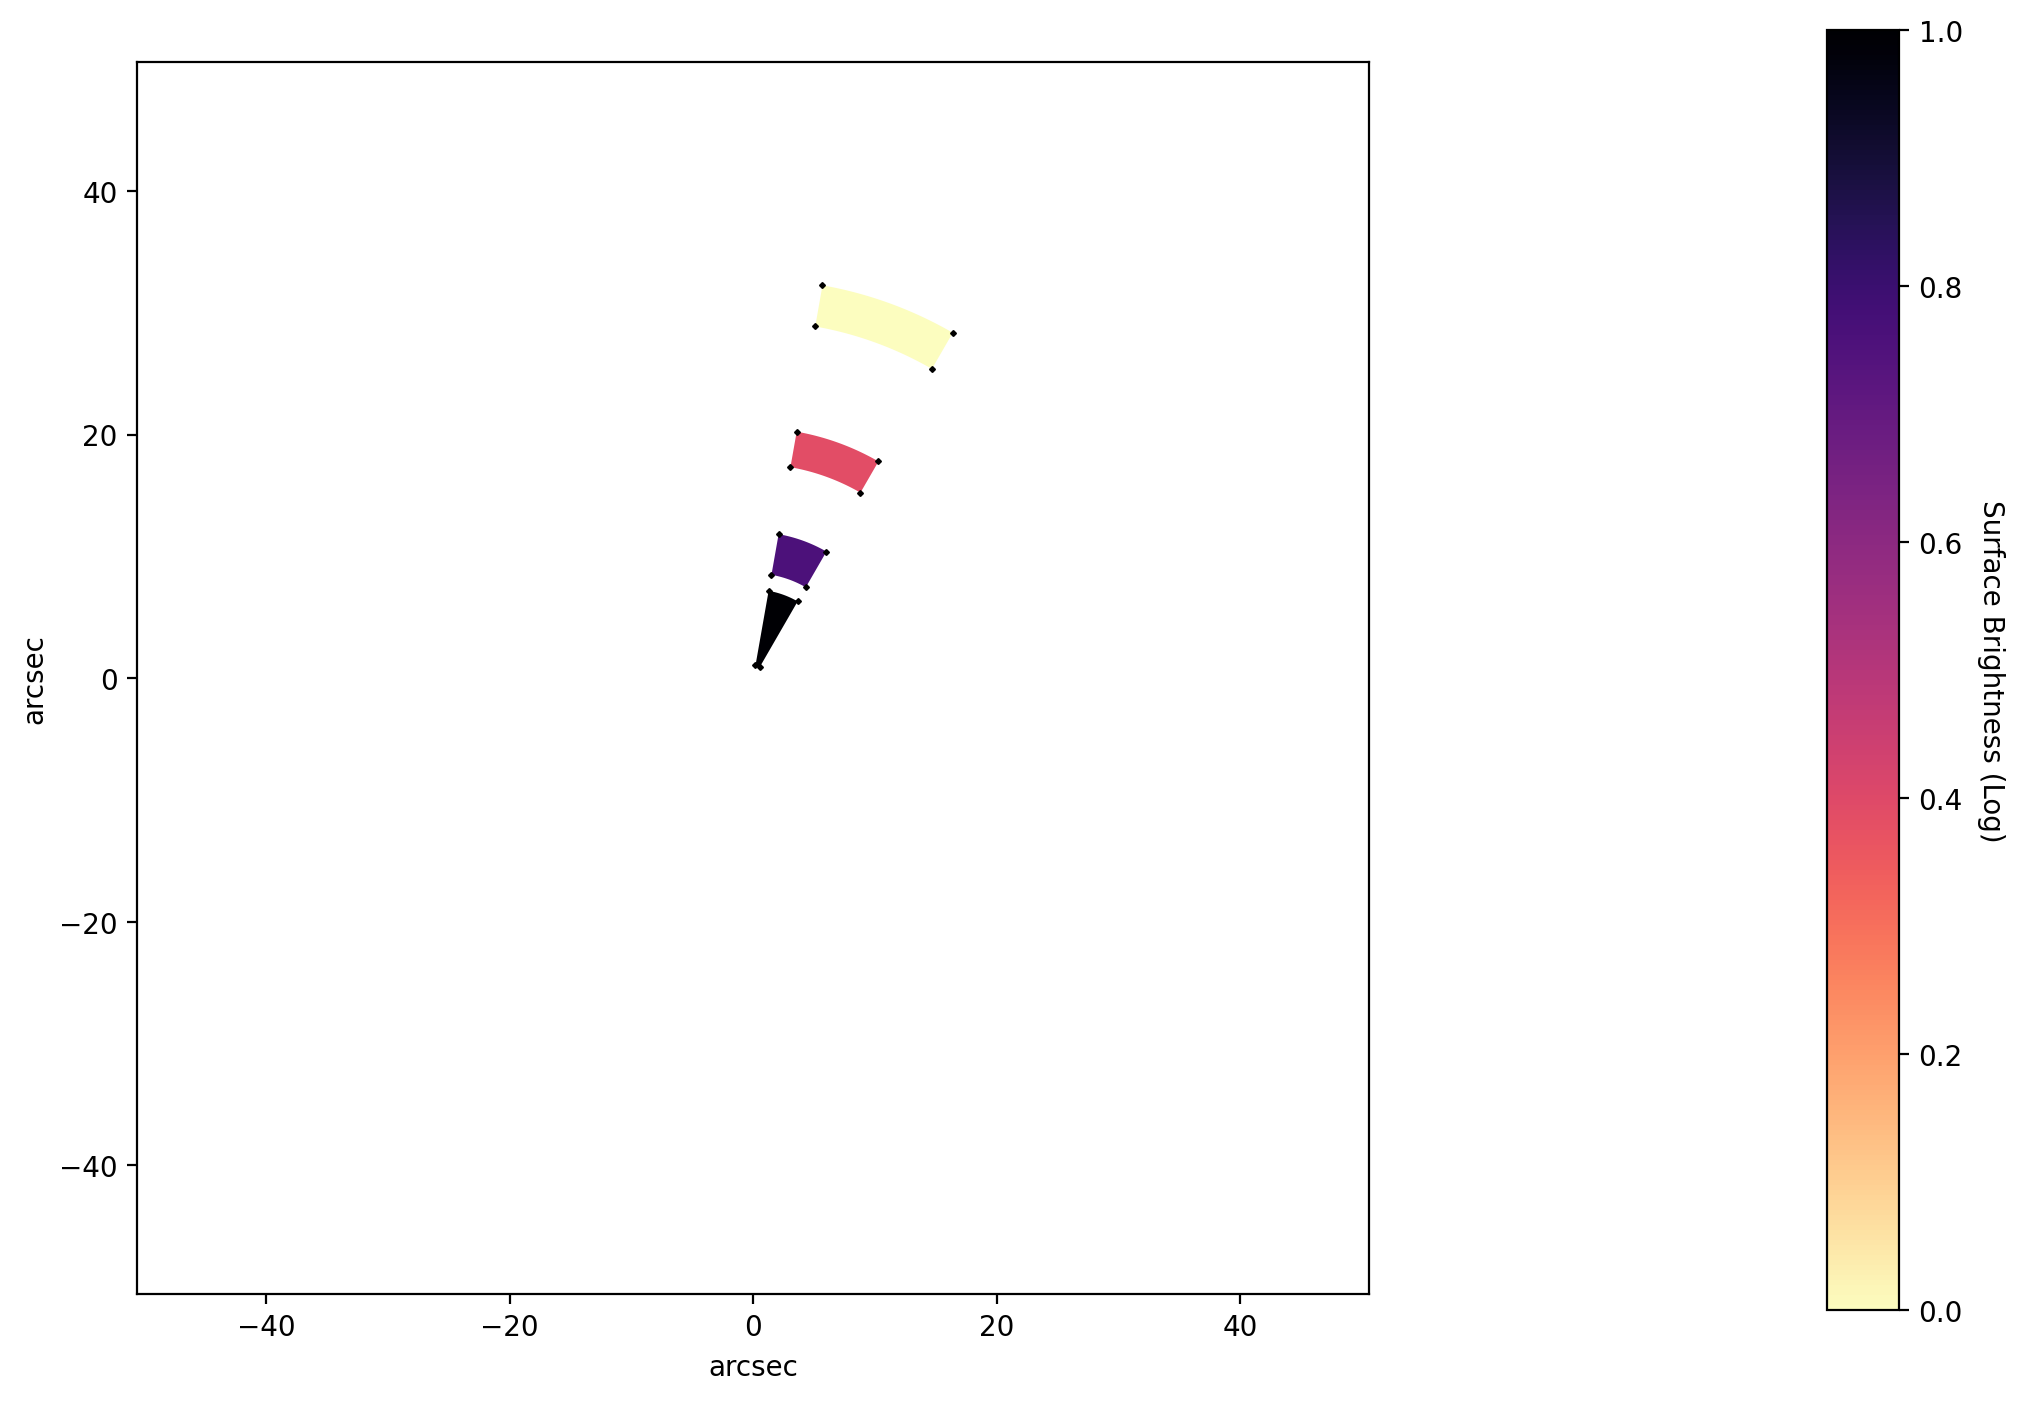

In [66]:
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
# ax.set_xlim(np.arctan(-4/d) * (180 / np.pi) * 3600 , np.arctan(4/d) * (180 / np.pi) * 3600)
# ax.set_ylim(np.arctan(-4/d) * (180 / np.pi) * 3600 , np.arctan(4/d) * (180 / np.pi) * 3600)
for i in range(len(XX)):
  ax.fill(np.ravel(XX[i]), np.ravel(YY[i]), lw=0, color=cmap(normalize(surface_norm[0,i])), label="%s"%(z0ly[i]/pctoly))
  ax.set_xlabel("arcsec")
  ax.set_ylabel("arcsec")
  ax.set_xlim(np.arctan(-4/d) * (180 / np.pi) * 3600 , np.arctan(4/d) * (180 / np.pi) * 3600)
  ax.set_ylim(np.arctan(-4/d) * (180 / np.pi) * 3600 , np.arctan(4/d) * (180 / np.pi) * 3600)
  for j in range(len(corners[i])):
    ax.scatter(corners[i][j][0], corners[i][j][1], color = "black", marker = "x", s = 2)
  ax.set_box_aspect(1)

cbax = fig.add_axes([0.96, 0.1, 0.03, 0.80])

ax.set_xlabel("arcsec")
ax.set_ylabel("arcsec")
ax.set_box_aspect(1)

cb = matplotlib.colorbar.ColorbarBase(cbax, cmap=cmap, norm=normalize, orientation='vertical')
cb.set_label("Surface Brightness (Log)", rotation=270, labelpad=15)

# def label_cbrt(x,pos):
#     return "{:.1f}".format(np.log10(np.exp((( x * (np.max(mean) - np.min(mean)) )+ (np.min(mean)) ))))

def label_cbrt(x,pos):
    return "{:.1f}".format(x)

cb.formatter = matplotlib.ticker.FuncFormatter(label_cbrt)
cb.update_ticks()
# plt.tight_layout()
# plt.savefig("figure2.png", dpi = 700, bbox_inches='tight')

plt.show()

In [67]:
corners

[[[1.2687076024957156, 7.195198360444721],
  [3.653097946496126, 6.327351248356821],
  [0.18765218572395728, 1.0642284293078044],
  [0.5403229341222561, 0.9358667743944387]],
 [[2.089232238836551, 11.848624813072929],
  [6.015704474722009, 10.41950579353796],
  [1.5006559368552188, 8.51064273218838],
  [4.3209665572580445, 7.484133614976906]],
 [[3.573694140686836, 20.267426608951578],
  [10.29004216658535, 17.82287584455195],
  [3.059339641512462, 17.350377288945378],
  [8.809017412726593, 15.257665723601393]],
 [[5.693172021248179, 32.287582980060996],
  [16.392835495711594, 28.393223958691017],
  [5.097272467295851, 28.908068673412856],
  [14.677011114602033, 25.42132895374383]]]